## This code is to find out the different of each epoch and batch size combination

In [102]:
import os
from pathlib import Path
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Path

In [103]:
'''find the Model path'''
# find the current path
current_path = os.getcwd()
print('The current path is:', current_path)

# find the parent path
parent_path = Path(current_path).parent
print('The parent path is:', parent_path)

# find the data path
data_path = parent_path / 'Data/resnet/fashion_mnist/'
print('The data path is:', data_path)

The current path is: /root/GreenAI/Cloud/4090/code
The parent path is: /root/GreenAI/Cloud/4090
The data path is: /root/GreenAI/Cloud/4090/Data/resnet/fashion_mnist


### extract data

In [104]:
batch_sizes = [128, 256, 512]
epochs = [10, 20, 30, 40, 50]
rounds = 1

#### read all the data from all the folders

In [105]:
folder_list = []
for epoch in epochs:
    for batch in batch_sizes:
        for round in range(rounds):
            folder_name = 'E' + str(epoch) + '_B' + str(batch) + '_R' + str(round)
            # print('The folder name is:', folder_name)
            folder_list.append(folder_name)
            
# find the folders in the data path
folder_names = os.listdir(data_path)
print('The folder names are:', folder_names)
print('The folder list is:', folder_list)

# find the common folders
common_folders = list(set(folder_list).intersection(folder_names))
# sort the common folders
common_folders.sort()
print('The common folders are:', common_folders)
print(len(common_folders))

The folder names are: ['E10_B128_R0', 'E10_B256_R0', 'E10_B512_R0', 'E20_B128_R0', 'E20_B256_R0', 'E20_B512_R0', 'E30_B128_R0', 'E30_B256_R0', 'E30_B512_R0', 'E40_B128_R0', 'E40_B256_R0', 'E40_B512_R0', 'E50_B128_R0', 'E50_B256_R0', 'E50_B512_R0']
The folder list is: ['E10_B128_R0', 'E10_B256_R0', 'E10_B512_R0', 'E20_B128_R0', 'E20_B256_R0', 'E20_B512_R0', 'E30_B128_R0', 'E30_B256_R0', 'E30_B512_R0', 'E40_B128_R0', 'E40_B256_R0', 'E40_B512_R0', 'E50_B128_R0', 'E50_B256_R0', 'E50_B512_R0']
The common folders are: ['E10_B128_R0', 'E10_B256_R0', 'E10_B512_R0', 'E20_B128_R0', 'E20_B256_R0', 'E20_B512_R0', 'E30_B128_R0', 'E30_B256_R0', 'E30_B512_R0', 'E40_B128_R0', 'E40_B256_R0', 'E40_B512_R0', 'E50_B128_R0', 'E50_B256_R0', 'E50_B512_R0']
15


### analysis data

#### show the time of each layer consume, and each part of the training

In [106]:
def Layer_Time(Layers_time):
    avgLayers_time = Layers_time.mean(axis=1)
    # print('The average Layers_time is:', avgLayers_time.shape)
    layer_name = ['AdaptiveAvgPool2d', 'BatchNorm2d', 'Conv2d', 'Flatten', 'Linear', 'MaxPool2d', 'ReLU', 'Residual']
    # plot the avgLayers_time
    plt.figure()
    plt.bar(layer_name, avgLayers_time)
    plt.xlabel('Layer Name')
    plt.ylabel('Time (s)')
    plt.title('Average Time of Each Type of Layer')
    plt.show()

In [107]:
def Block_T(Block_time):
    avgBlocks_time = Block_time.mean(axis=1)
    # print('The average Blocks_time is:', avgBlocks_time.shape)
    block_name = ['Block1', 'Block2', 'Block3', 'Block4', 'Block5']
    # plot the avgBlocks_time
    plt.figure()
    plt.bar(block_name, avgBlocks_time)
    plt.xlabel('Block Name')
    plt.ylabel('Time (s)')
    plt.title('Average Time of Each Type of Block')
    plt.show()

In [108]:
def TrainPart_T(TrainPart_time):
    avgTrainPart_time = TrainPart_time.mean(axis=1)
    # print('The average TrainPart_time is:', avgTrainPart_time.shape)
    TrainPart_name = ['DataLoad', 'Forward', 'Backward', 'Test']
    # plot the avgTrainPart_time
    plt.figure()
    plt.bar(TrainPart_name, avgTrainPart_time)
    plt.xlabel('Train Part Name')
    plt.ylabel('Time (s)')
    plt.title('Average Time of Each Type of Train Part')
    plt.show()

In [109]:
def Epoch_TimeAcc(Epoch_time, TestAcc):
    # set 2 y-axis, the left axis is Epoch_time, the right axis is TestAcc
    fig, ax1 = plt.subplots()
    ax2 = ax1.twinx()
    ax1.plot(Epoch_time, 'g-')
    ax2.plot(TestAcc, 'b-')
    ax1.set_xlabel('Epochs')
    ax1.set_ylabel('Time (s)', color='g')
    ax2.set_ylabel('Test Accuracy', color='b')
    # add a legend
    ax1.legend(['Epoch Time'], loc='upper left')
    ax2.legend(['Test Accuracy'], loc='upper right')
    plt.title('Epoch Time and Test Accuracy')
    plt.show()

In [110]:
def Epoch_EnergyAcc(EpochEnergy, TrainAcc, TestAcc):
    Round_epochenergy = np.zeros((len(EpochEnergy), 1))
    for i in range(len(EpochEnergy)):
        epochenergy = EpochEnergy[i][0]
        # print('The epoch energy is:', epochenergy)
        epochtotalenergy = np.sum(epochenergy)
        # print('The epoch total energy is:', epochtotalenergy)
        Round_epochenergy[i] = epochtotalenergy
    # print('The Round_epochenergy is:', Round_epochenergy)
    # set 2 y-axis, the left axis is EpochEnergy, the right axis is TrainAcc and TestAcc
    fig, ax1 = plt.subplots()
    ax2 = ax1.twinx()
    ax1.plot(Round_epochenergy, 'g-')
    ax2.plot(TrainAcc, 'b-')
    ax2.plot(TestAcc, 'r-')
    ax1.set_xlabel('Epochs')
    ax1.set_ylabel('Energy (J)', color='g')
    ax2.set_ylabel('Accuracy', color='b')
    # add a legend
    ax1.legend(['Epoch Energy'], loc='upper left')
    ax2.legend(['Train Accuracy', 'Test Accuracy'], loc='upper right')
    plt.title('Epoch Energy and Accuracy')
    plt.show()

In [113]:
def Epeoch_EnergyTime(Epoch_time,EpochEnergy):
    Round_epochenergy = np.zeros((len(EpochEnergy), 1))
    for i in range(len(EpochEnergy)):
        epochenergy = EpochEnergy[i][0]
        # print('The epoch energy is:', epochenergy)
        epochtotalenergy = np.sum(epochenergy)
        # print('The epoch total energy is:', epochtotalenergy)
        Round_epochenergy[i] = epochtotalenergy
    # print('The Round_epochenergy is:', Round_epochenergy)
    # Plot Epoch Time and Energy Consumption per Epoch
    fig, ax1 = plt.subplots(figsize=(10, 6))
    epochs = np.arange(1, len(Epoch_time)+1)
    ax1.set_xlabel('Epoch')
    ax1.set_ylabel('Epoch Time (s)', color='tab:blue')
    ax1.plot(epochs, Epoch_time, marker='o', color='tab:blue', label='Epoch Time')
    ax1.tick_params(axis='y', labelcolor='tab:blue')

    ax2 = ax1.twinx()
    ax2.set_ylabel('Energy Consumption', color='tab:red')
    ax2.plot(epochs, Round_epochenergy, marker='x', color='tab:red', label='Energy Consumption')
    ax2.tick_params(axis='y', labelcolor='tab:red')

    fig.tight_layout()
    plt.title('Epoch Time and Energy Consumption per Epoch')
    plt.show()
    

The folder path is: /root/GreenAI/Cloud/4090/Data/resnet/fashion_mnist/E10_B128_R0
The files are: ['Layers_time.npy', 'Train_part_time.npy', 'Train_time.npy', 'Train_acc.npy', 'Test_acc.npy', 'Epoch_time.npy', 'Epoch_energy.npy', 'Block_time.npy']


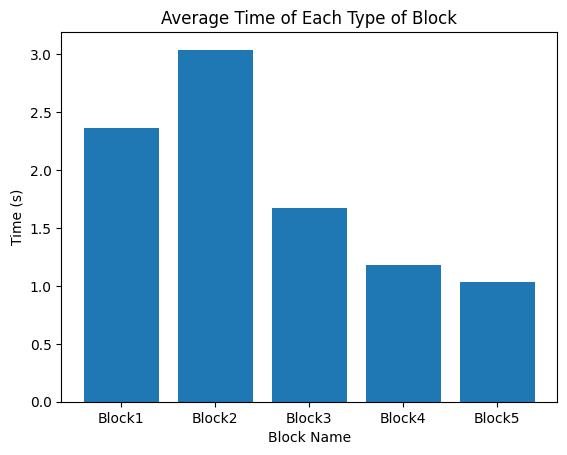

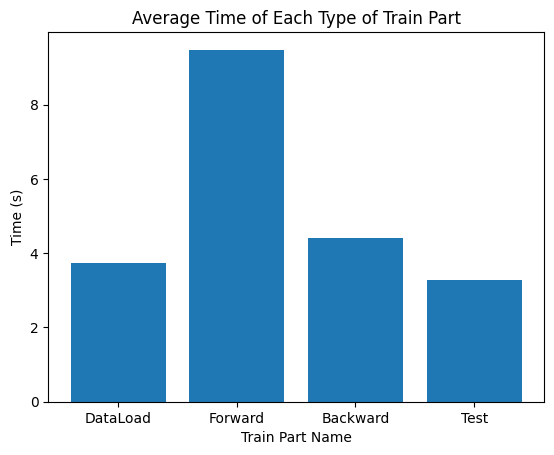

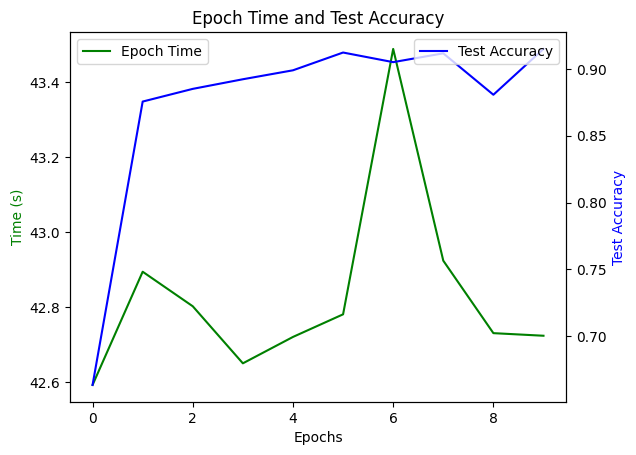

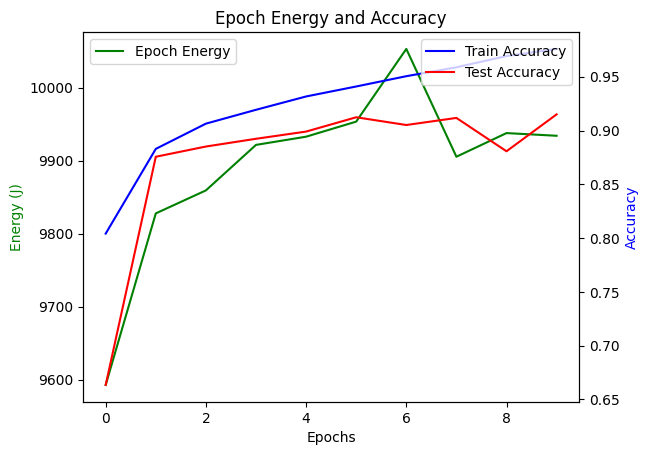

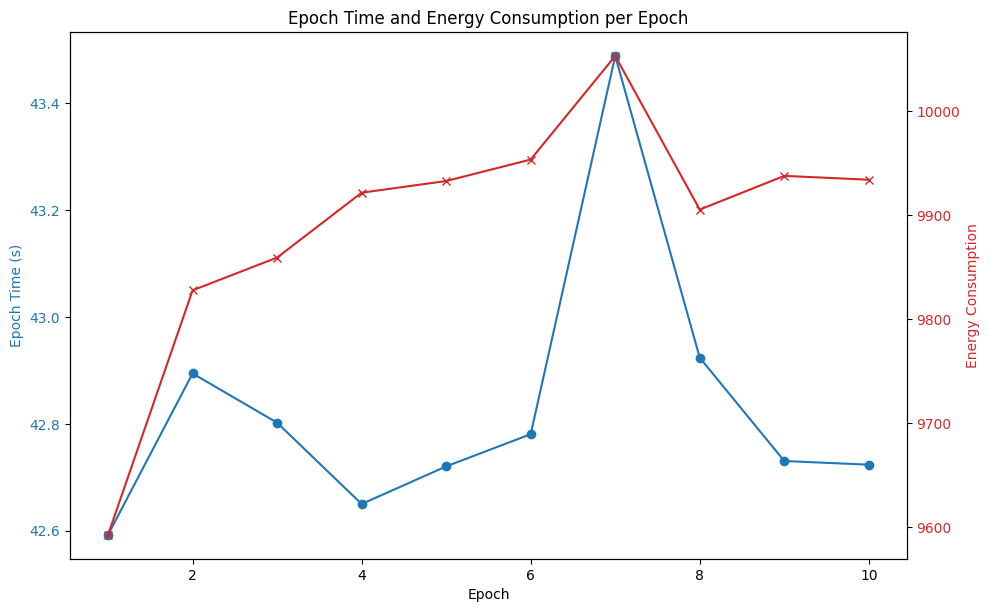

The folder path is: /root/GreenAI/Cloud/4090/Data/resnet/fashion_mnist/E10_B256_R0
The files are: ['Layers_time.npy', 'Train_part_time.npy', 'Train_time.npy', 'Train_acc.npy', 'Test_acc.npy', 'Epoch_time.npy', 'Epoch_energy.npy', 'Block_time.npy']


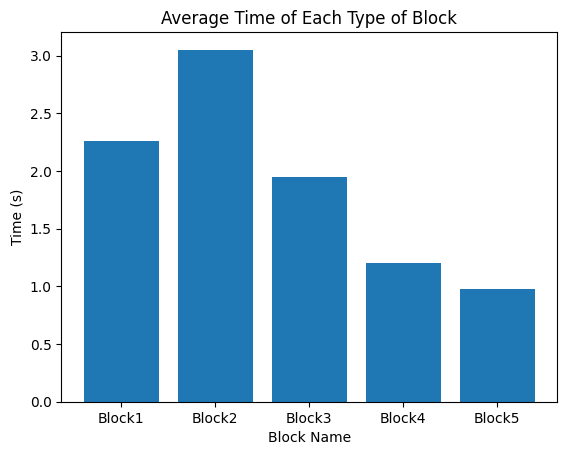

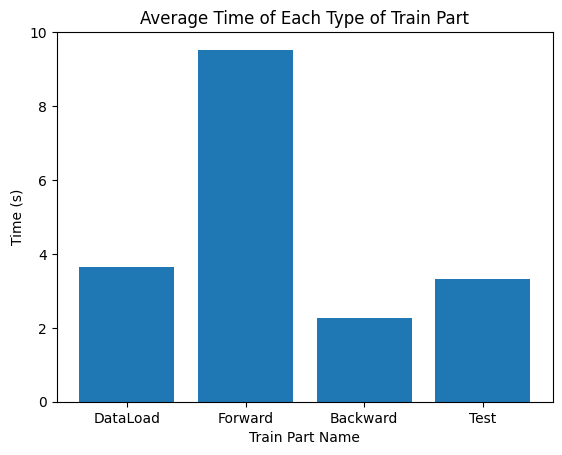

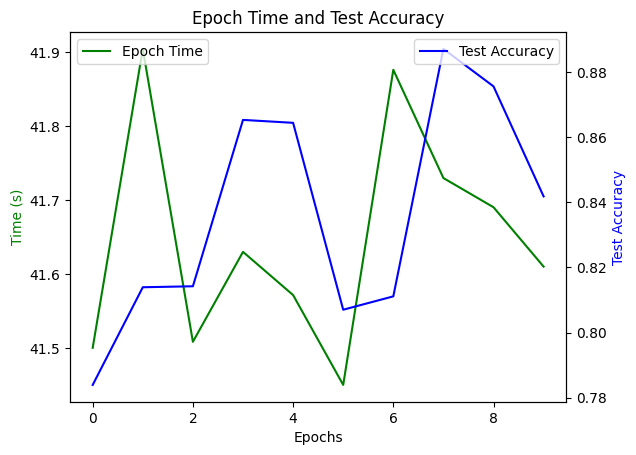

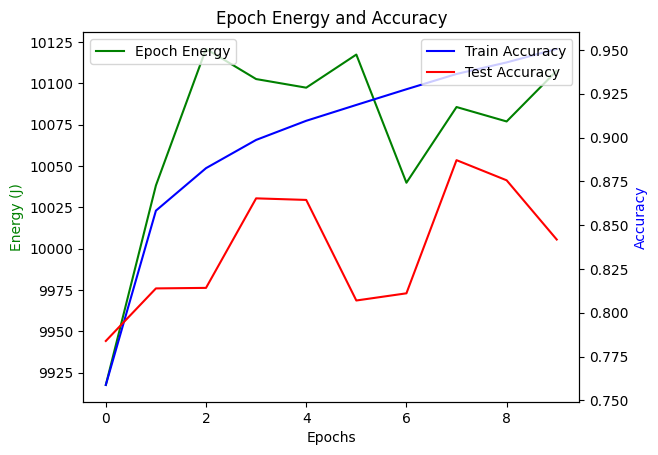

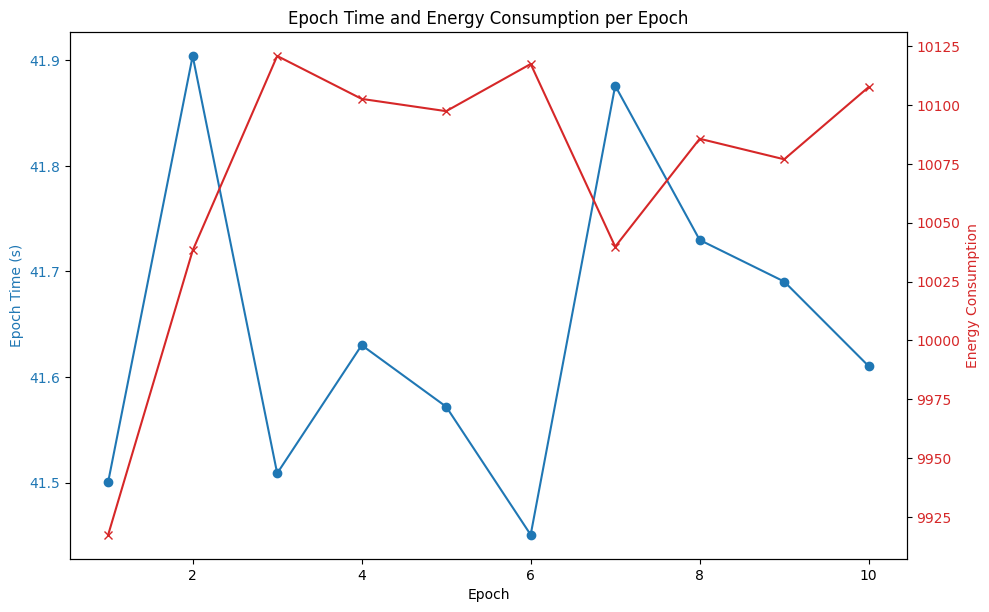

The folder path is: /root/GreenAI/Cloud/4090/Data/resnet/fashion_mnist/E10_B512_R0
The files are: ['Layers_time.npy', 'Train_part_time.npy', 'Train_time.npy', 'Train_acc.npy', 'Test_acc.npy', 'Epoch_time.npy', 'Epoch_energy.npy', 'Block_time.npy']


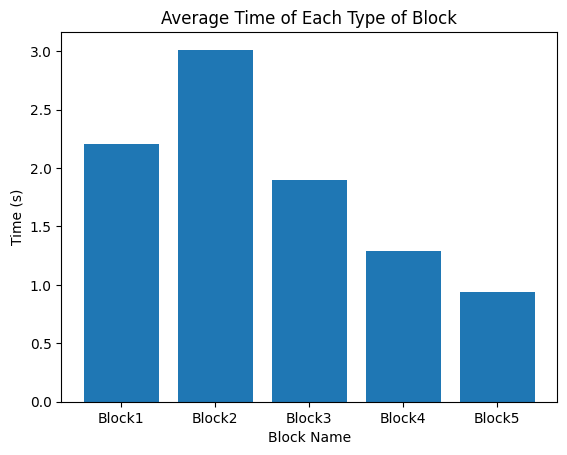

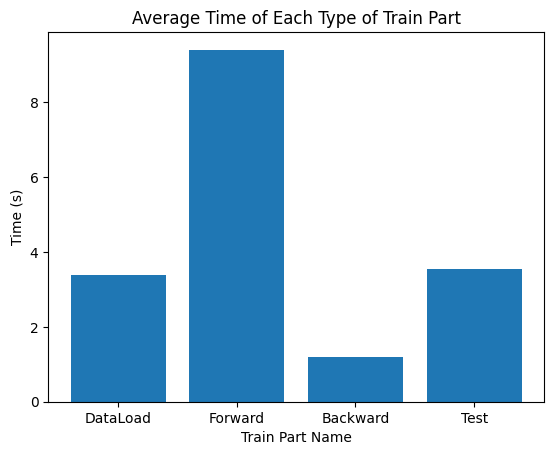

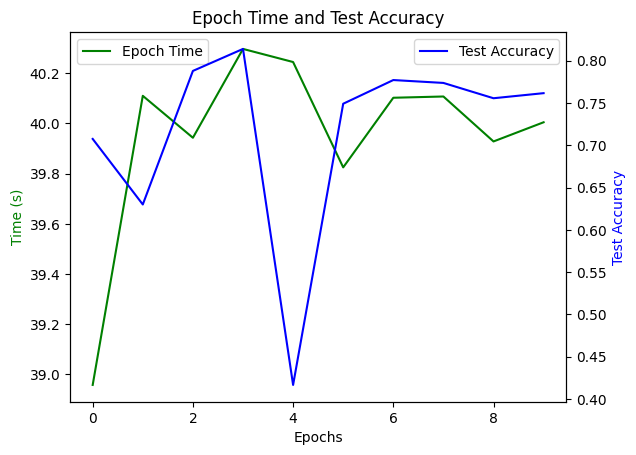

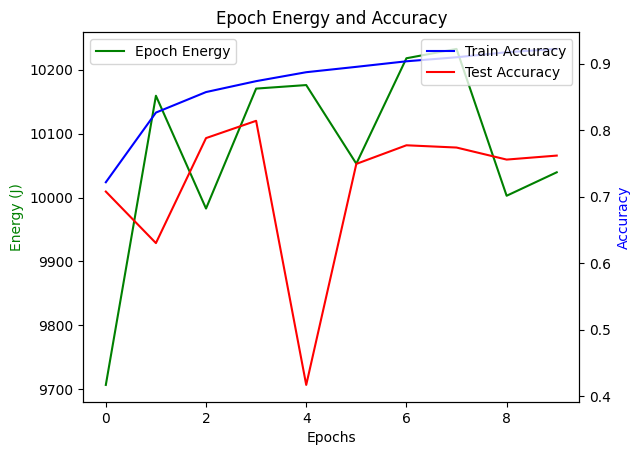

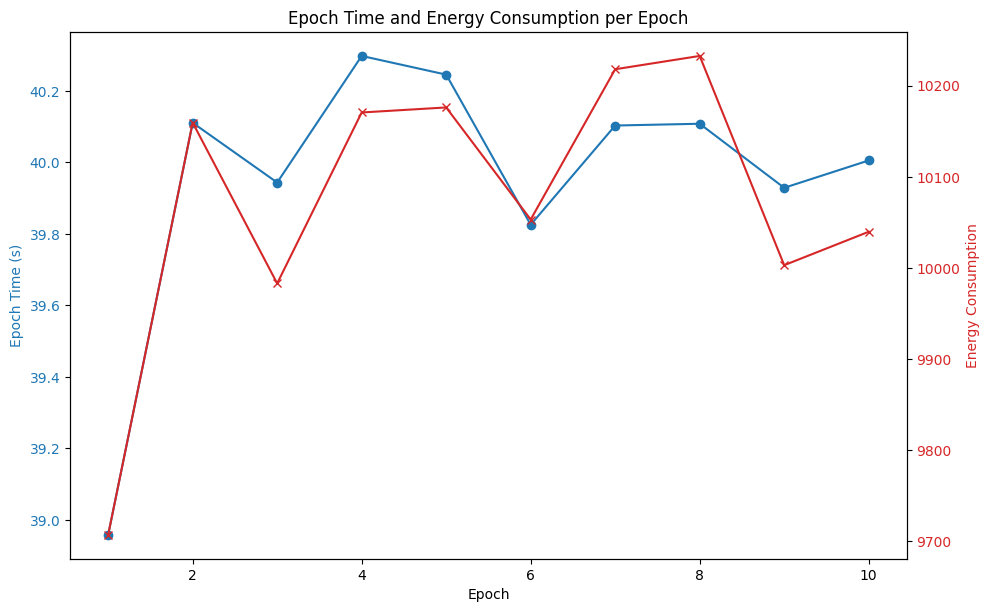

The folder path is: /root/GreenAI/Cloud/4090/Data/resnet/fashion_mnist/E20_B128_R0
The files are: ['Layers_time.npy', 'Train_part_time.npy', 'Train_time.npy', 'Train_acc.npy', 'Test_acc.npy', 'Epoch_time.npy', 'Epoch_energy.npy', 'Block_time.npy']


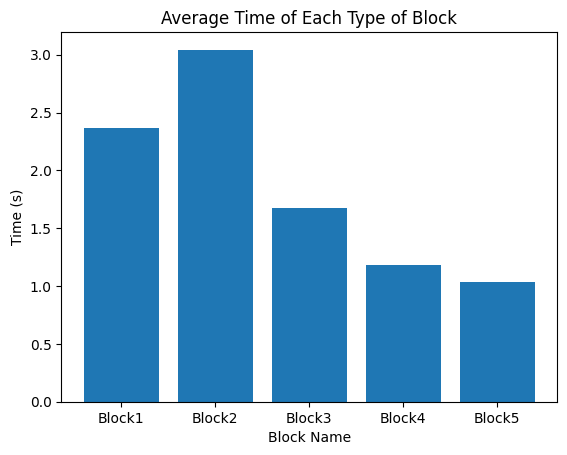

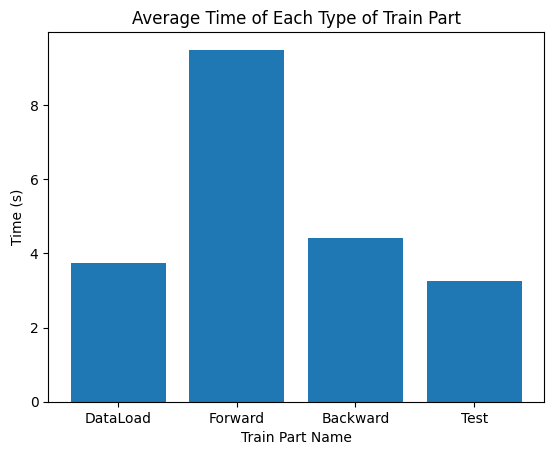

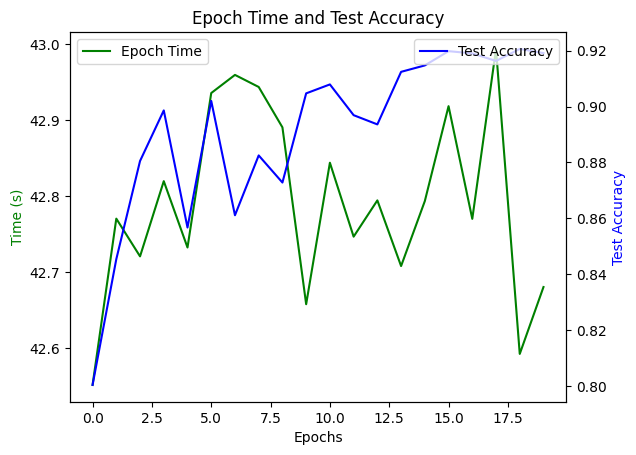

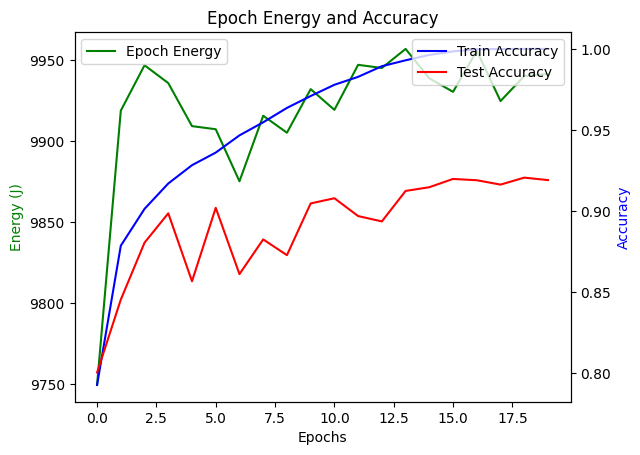

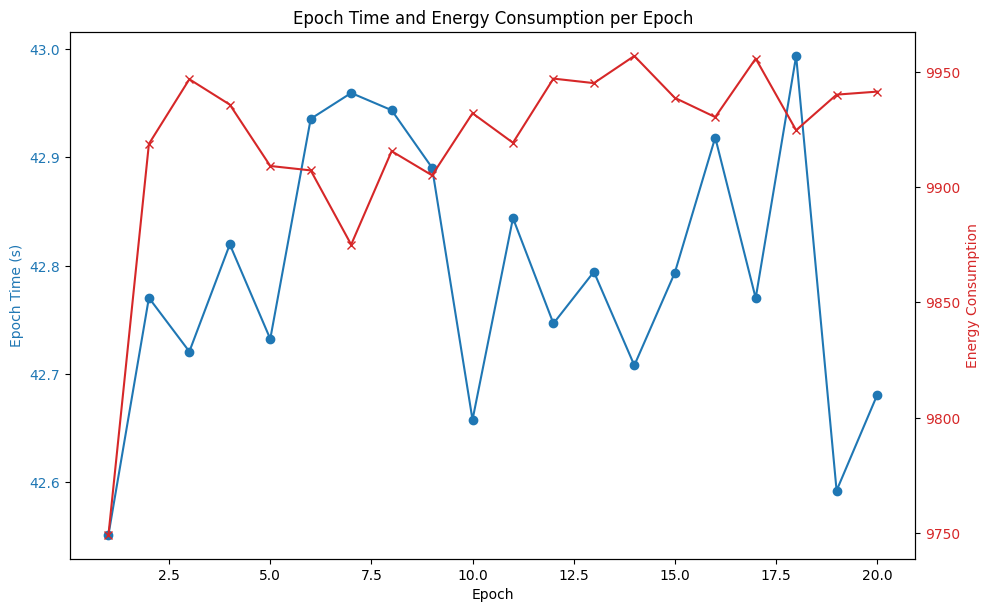

The folder path is: /root/GreenAI/Cloud/4090/Data/resnet/fashion_mnist/E20_B256_R0
The files are: ['Layers_time.npy', 'Train_part_time.npy', 'Train_time.npy', 'Train_acc.npy', 'Test_acc.npy', 'Epoch_time.npy', 'Epoch_energy.npy', 'Block_time.npy']


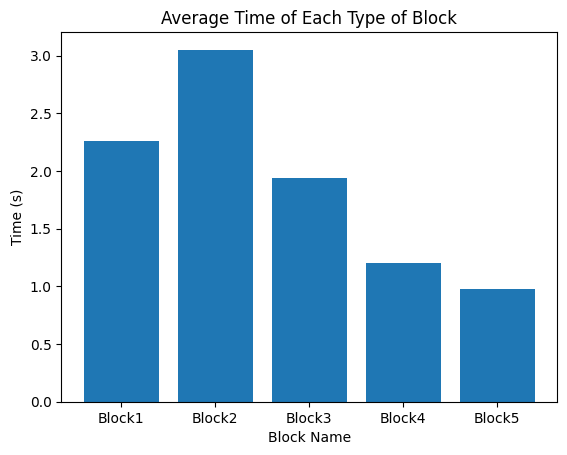

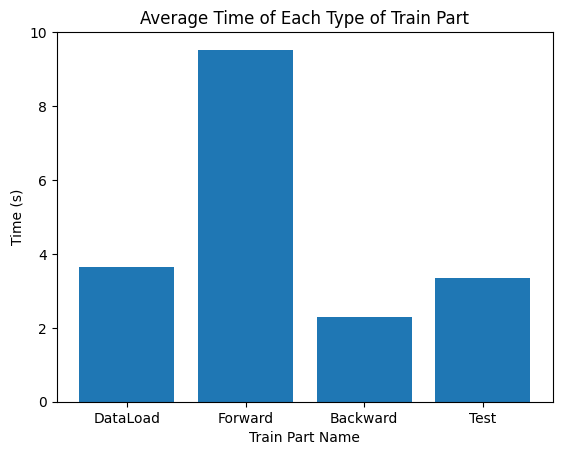

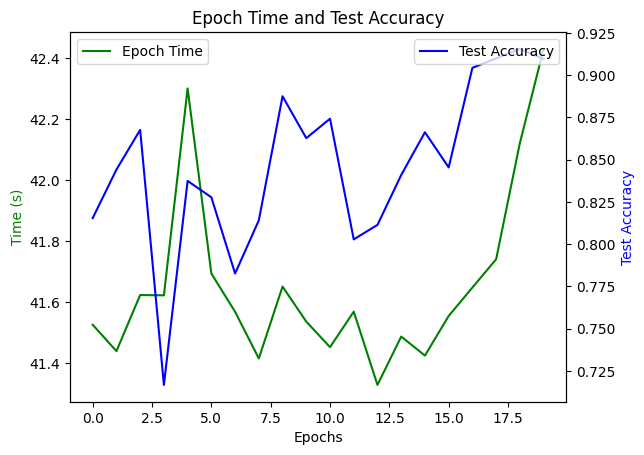

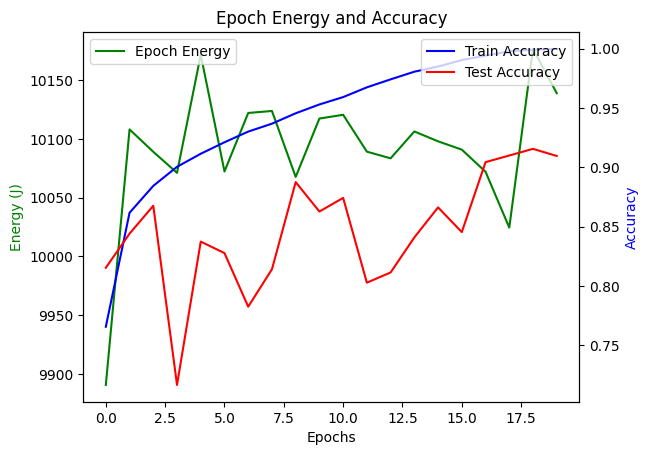

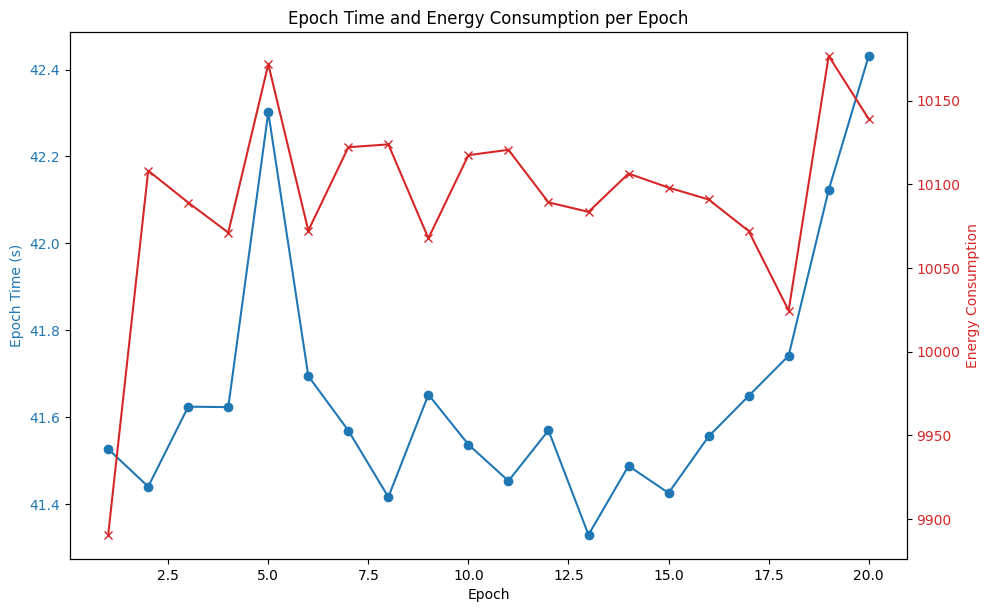

The folder path is: /root/GreenAI/Cloud/4090/Data/resnet/fashion_mnist/E20_B512_R0
The files are: ['Layers_time.npy', 'Train_part_time.npy', 'Train_time.npy', 'Train_acc.npy', 'Test_acc.npy', 'Epoch_time.npy', 'Epoch_energy.npy', 'Block_time.npy']


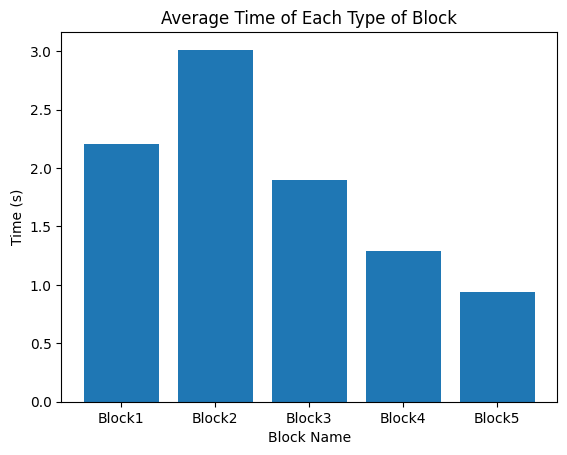

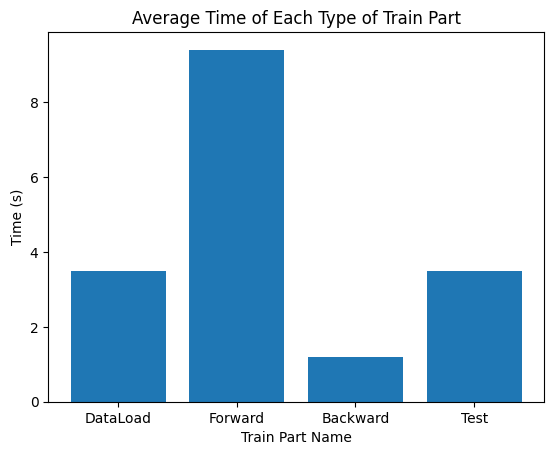

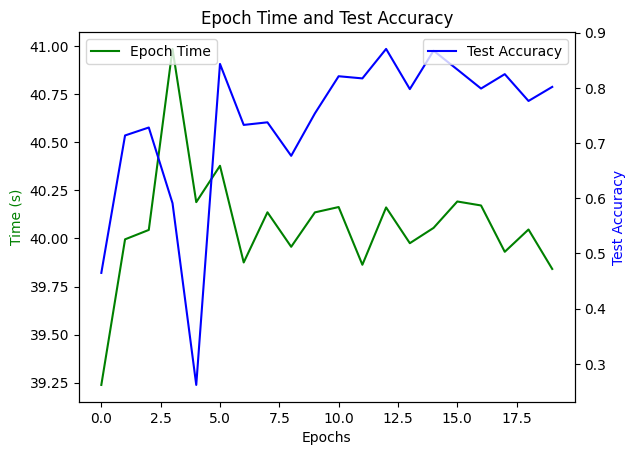

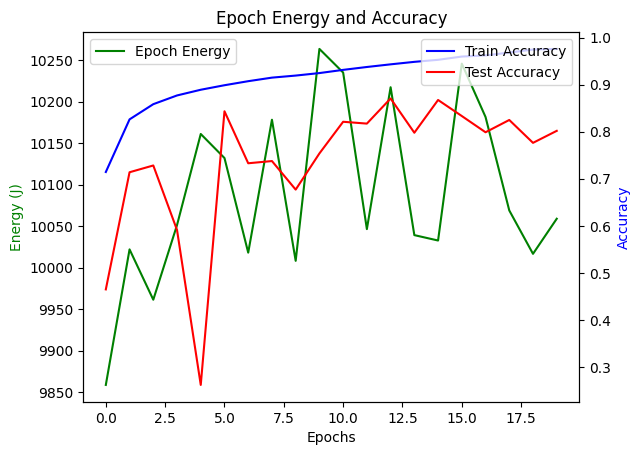

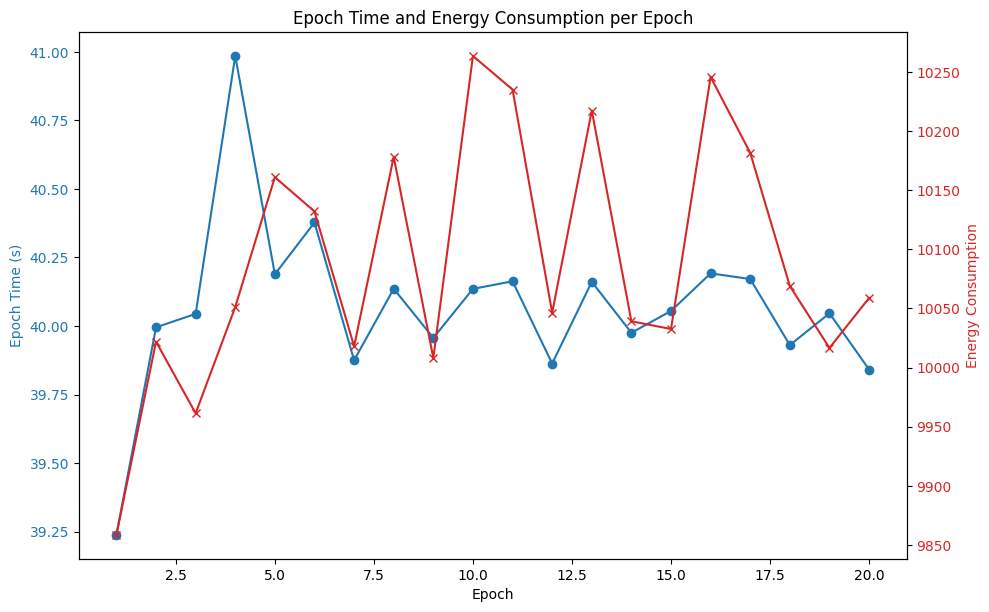

The folder path is: /root/GreenAI/Cloud/4090/Data/resnet/fashion_mnist/E30_B128_R0
The files are: ['Layers_time.npy', 'Train_part_time.npy', 'Train_time.npy', 'Train_acc.npy', 'Test_acc.npy', 'Epoch_time.npy', 'Epoch_energy.npy', 'Block_time.npy']


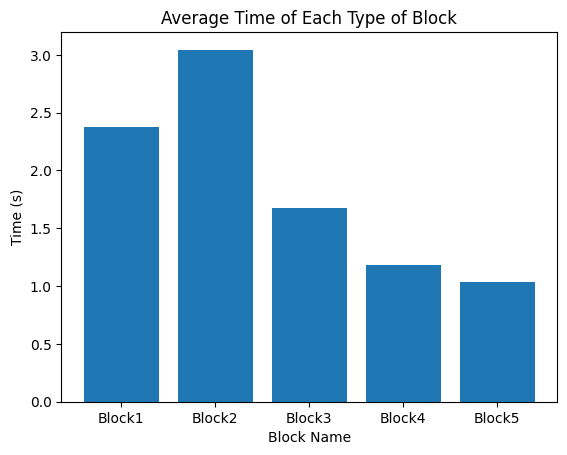

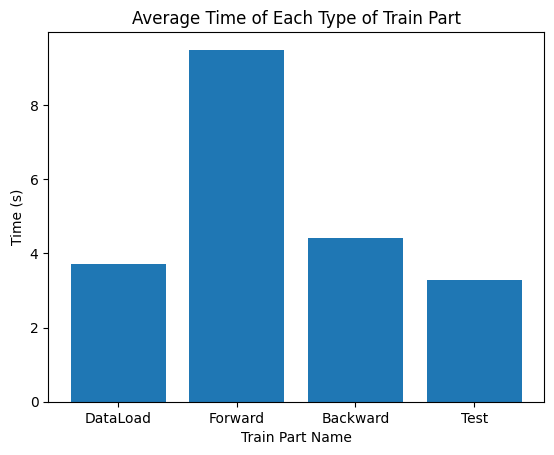

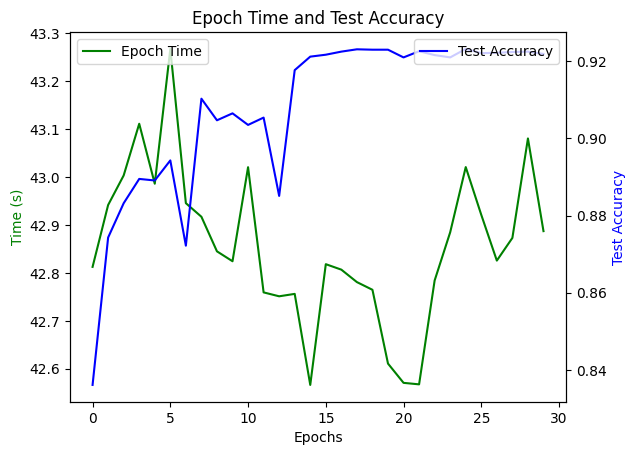

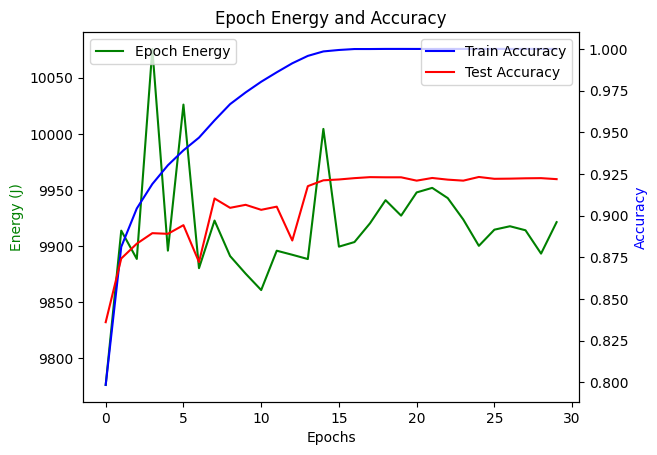

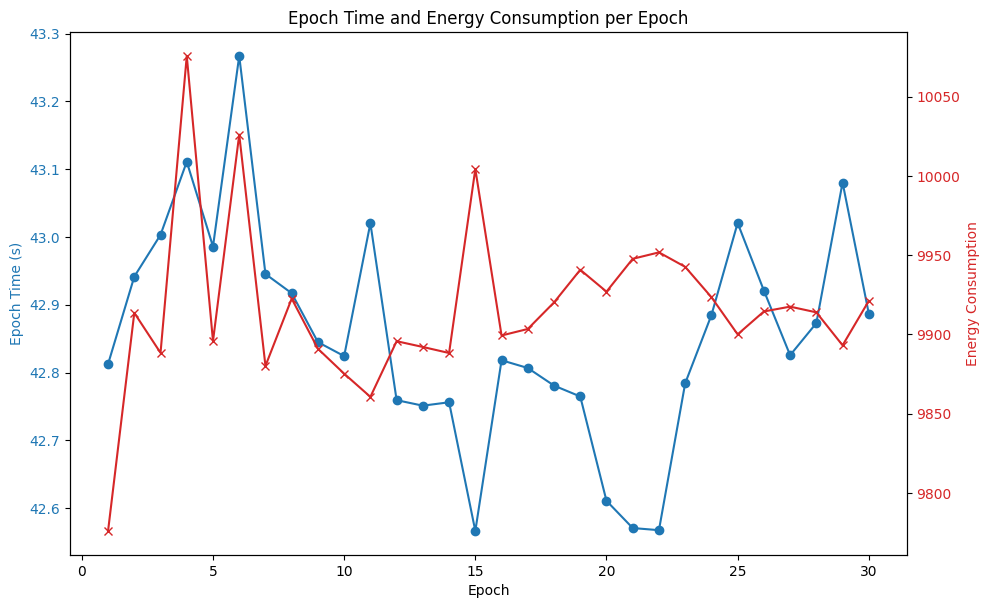

The folder path is: /root/GreenAI/Cloud/4090/Data/resnet/fashion_mnist/E30_B256_R0
The files are: ['Layers_time.npy', 'Train_part_time.npy', 'Train_time.npy', 'Train_acc.npy', 'Test_acc.npy', 'Epoch_time.npy', 'Epoch_energy.npy', 'Block_time.npy']


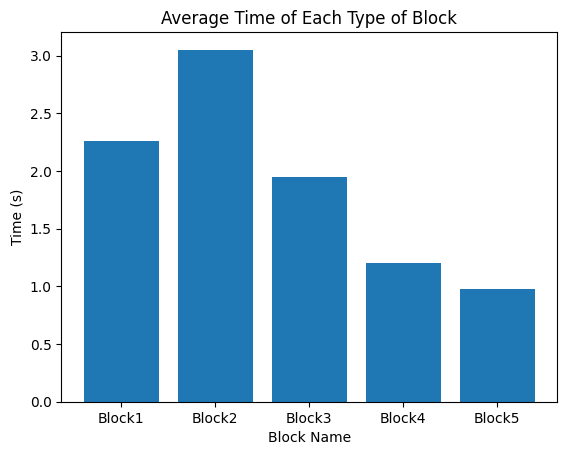

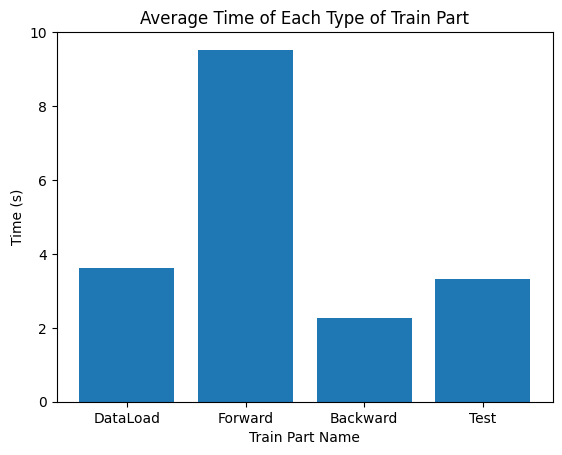

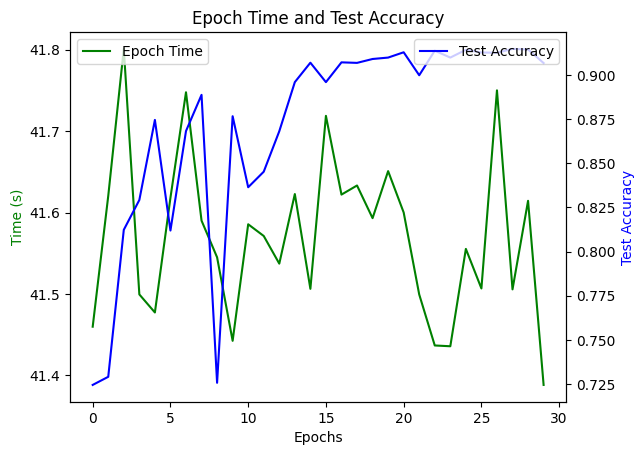

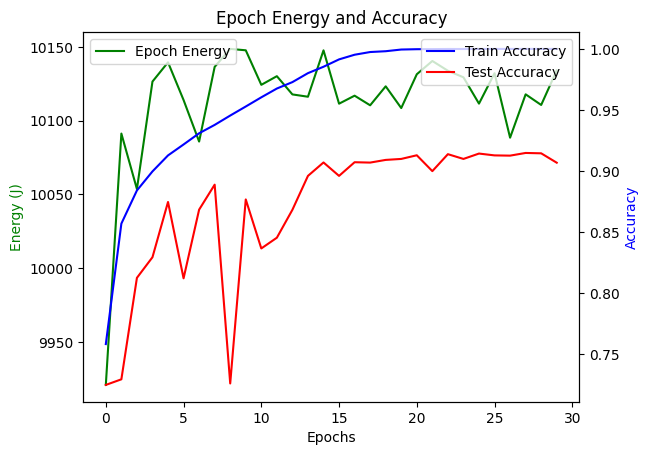

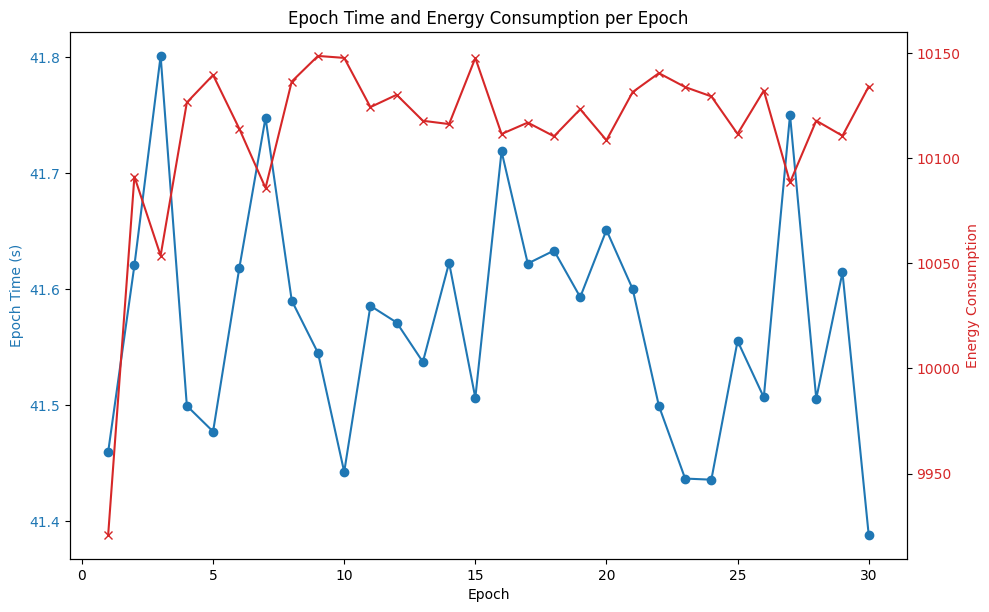

The folder path is: /root/GreenAI/Cloud/4090/Data/resnet/fashion_mnist/E30_B512_R0
The files are: ['Layers_time.npy', 'Train_part_time.npy', 'Train_time.npy', 'Train_acc.npy', 'Test_acc.npy', 'Epoch_time.npy', 'Epoch_energy.npy', 'Block_time.npy']


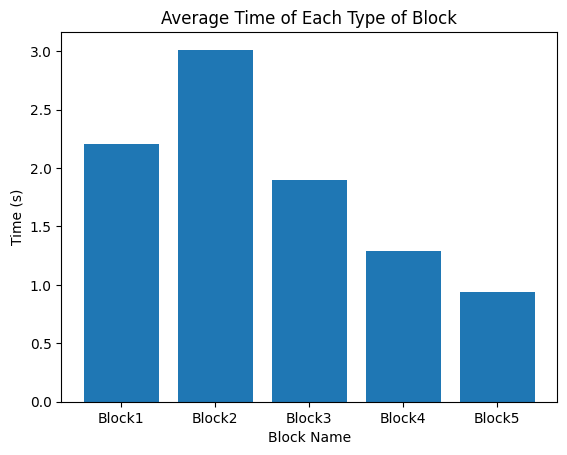

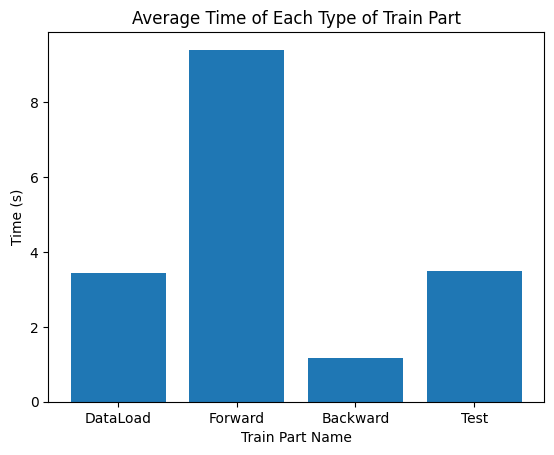

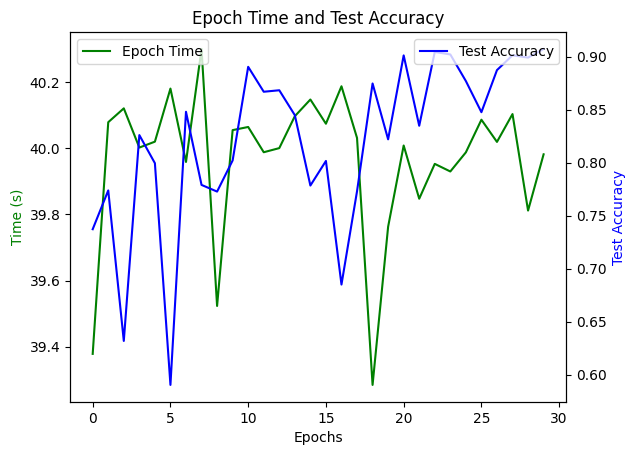

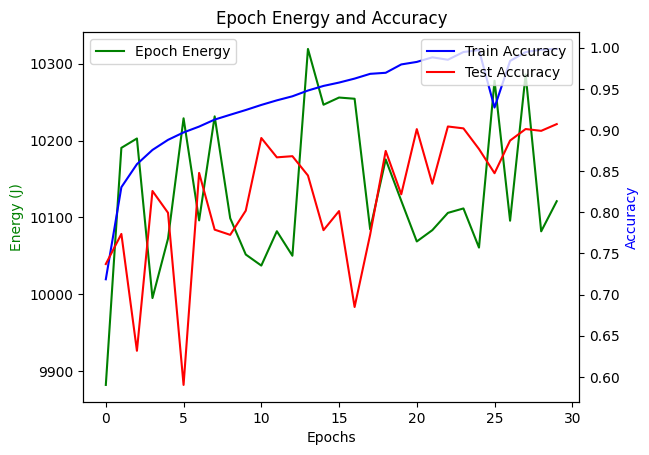

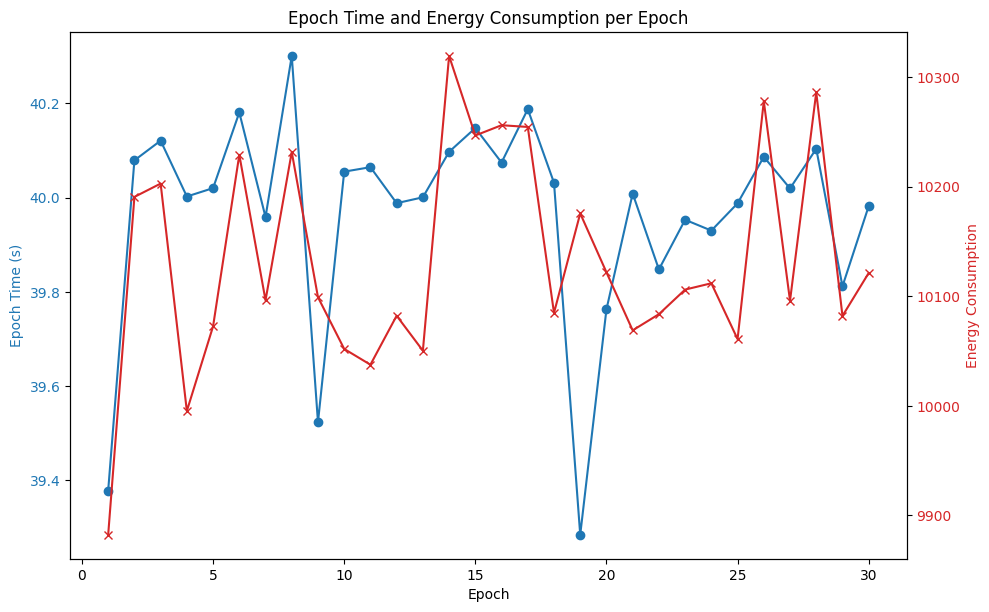

The folder path is: /root/GreenAI/Cloud/4090/Data/resnet/fashion_mnist/E40_B128_R0
The files are: ['Layers_time.npy', 'Train_part_time.npy', 'Train_time.npy', 'Train_acc.npy', 'Test_acc.npy', 'Epoch_time.npy', 'Epoch_energy.npy', 'Block_time.npy']


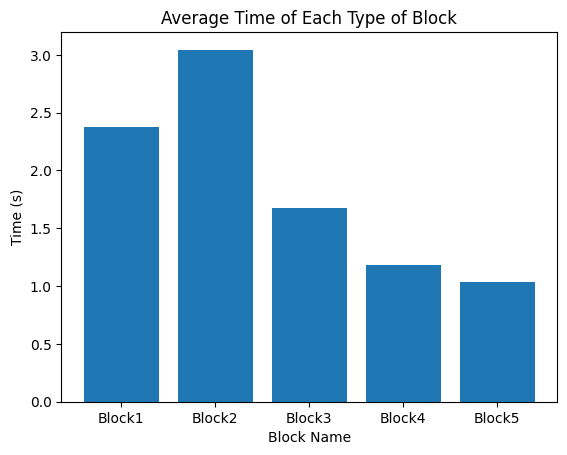

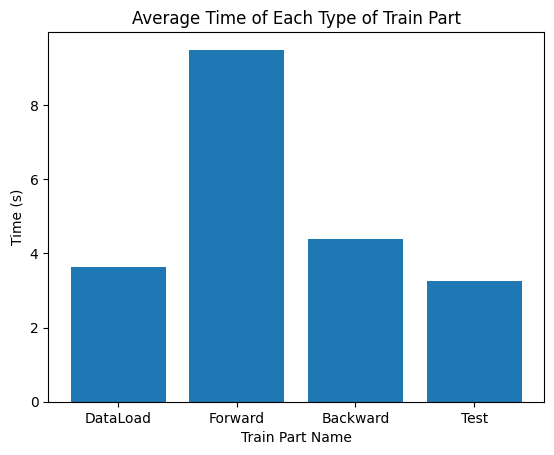

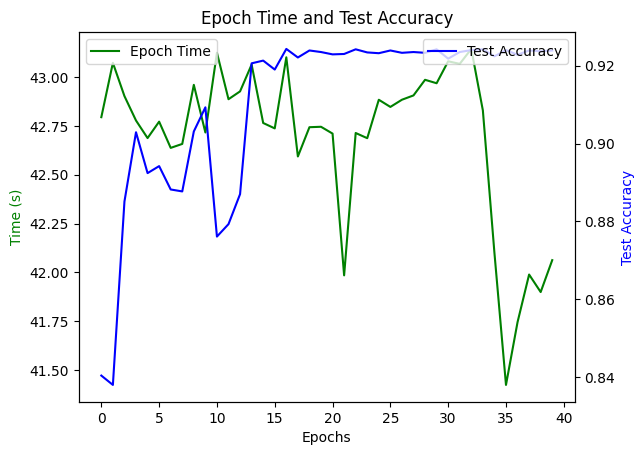

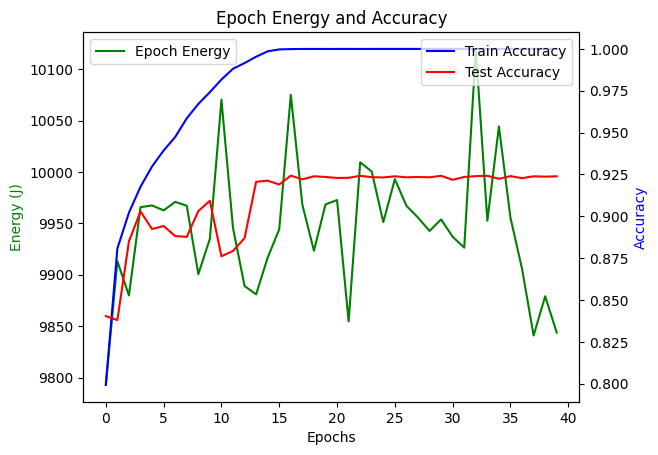

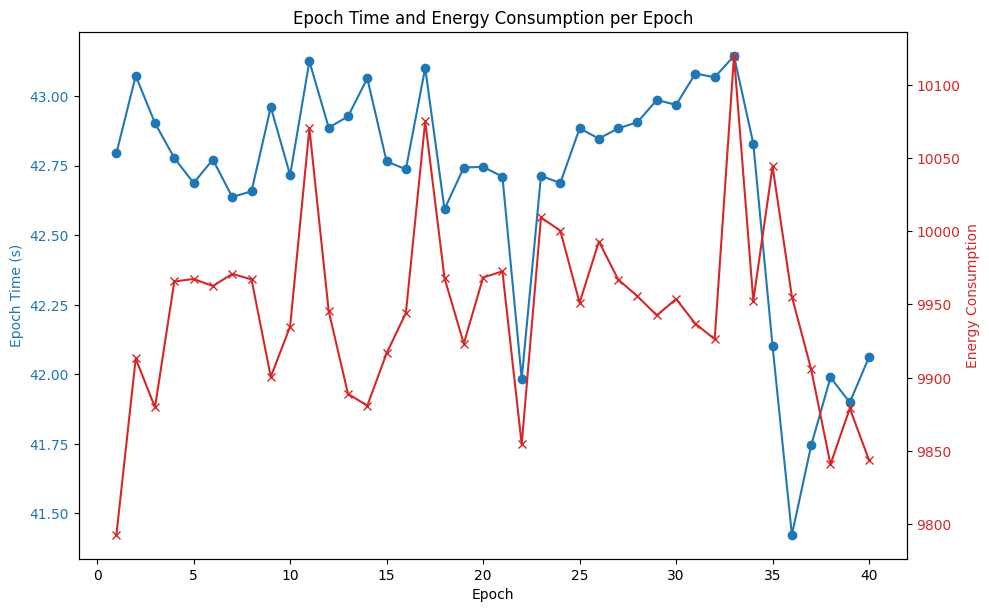

The folder path is: /root/GreenAI/Cloud/4090/Data/resnet/fashion_mnist/E40_B256_R0
The files are: ['Layers_time.npy', 'Train_part_time.npy', 'Train_time.npy', 'Train_acc.npy', 'Test_acc.npy', 'Epoch_time.npy', 'Epoch_energy.npy', 'Block_time.npy']


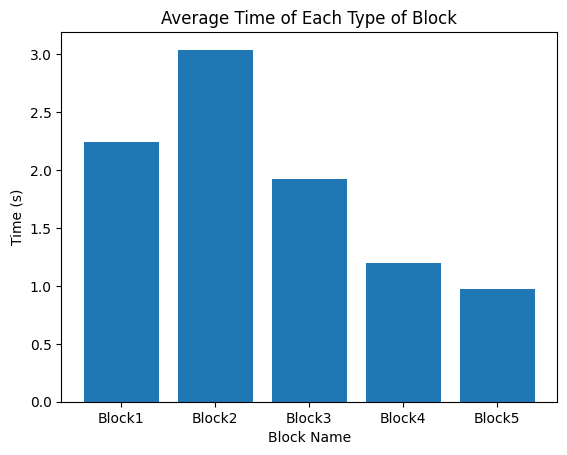

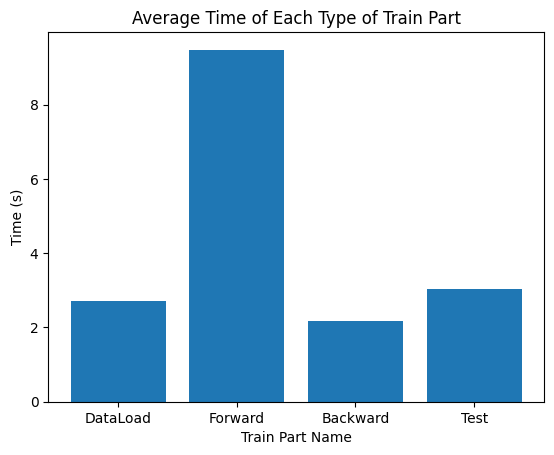

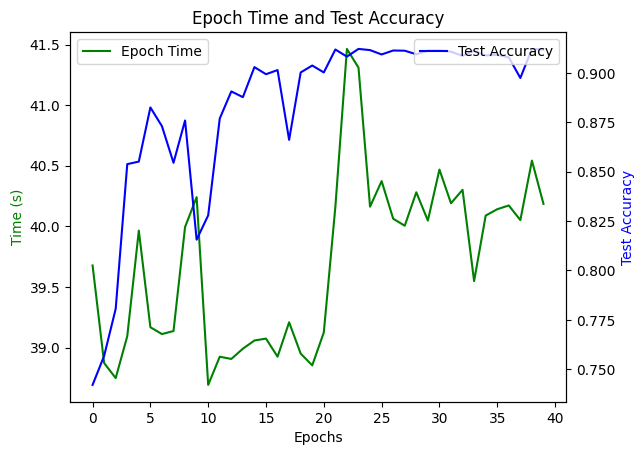

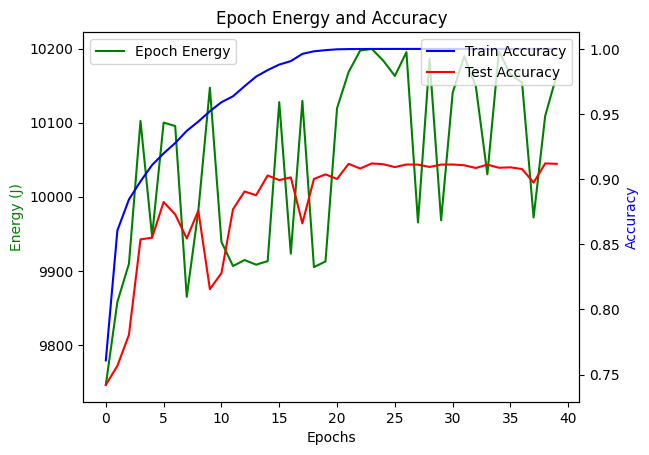

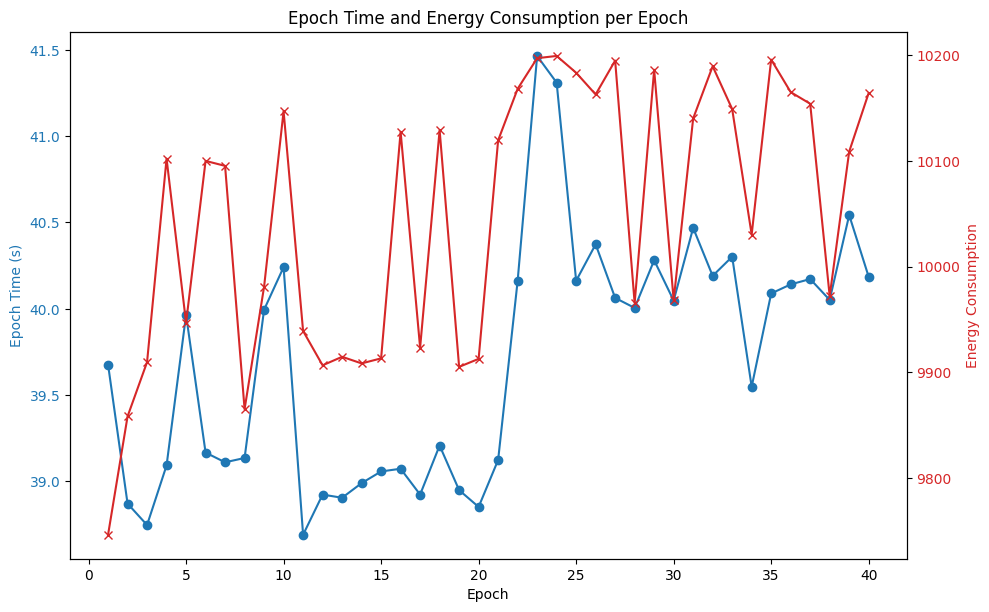

The folder path is: /root/GreenAI/Cloud/4090/Data/resnet/fashion_mnist/E40_B512_R0
The files are: ['Layers_time.npy', 'Train_part_time.npy', 'Train_time.npy', 'Train_acc.npy', 'Test_acc.npy', 'Epoch_time.npy', 'Epoch_energy.npy', 'Block_time.npy']


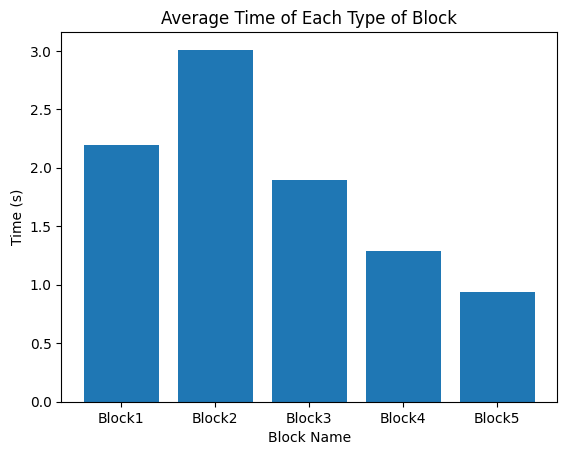

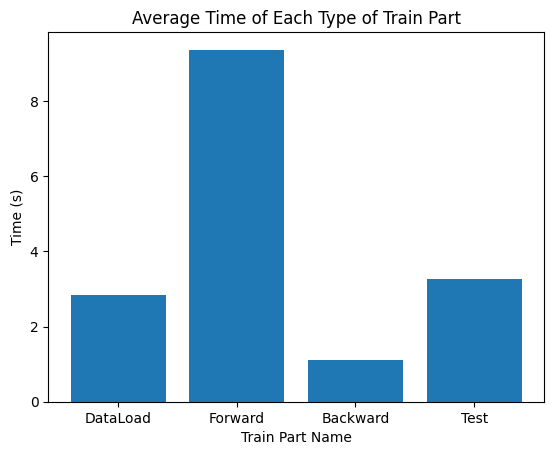

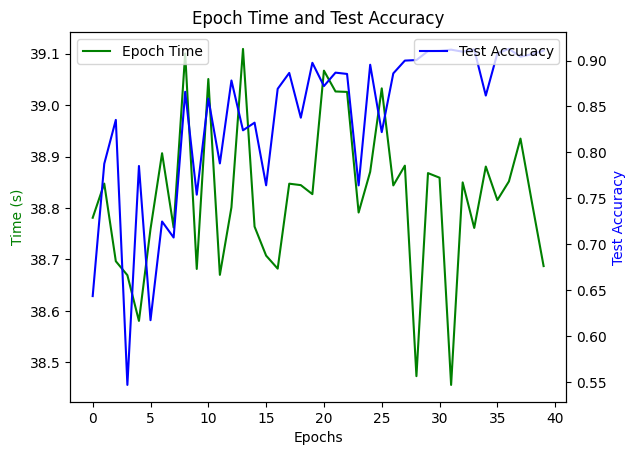

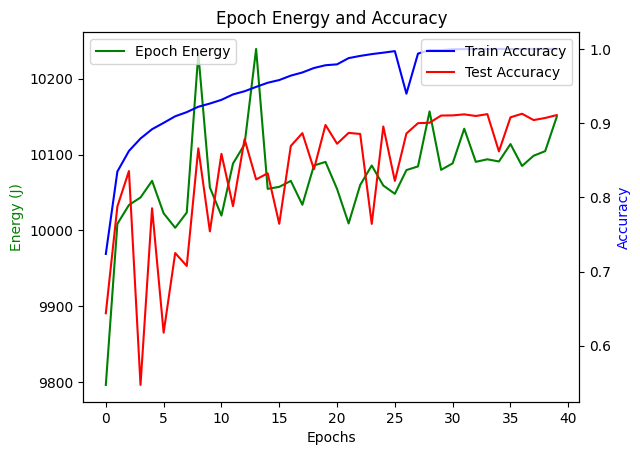

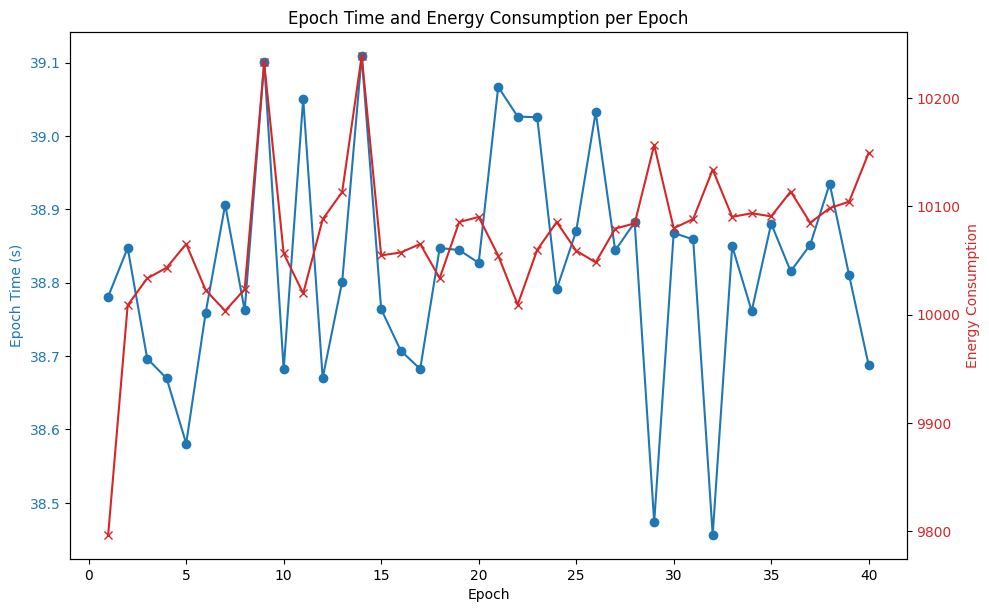

The folder path is: /root/GreenAI/Cloud/4090/Data/resnet/fashion_mnist/E50_B128_R0
The files are: ['Layers_time.npy', 'Train_part_time.npy', 'Train_time.npy', 'Train_acc.npy', 'Test_acc.npy', 'Epoch_time.npy', 'Epoch_energy.npy', 'Block_time.npy']


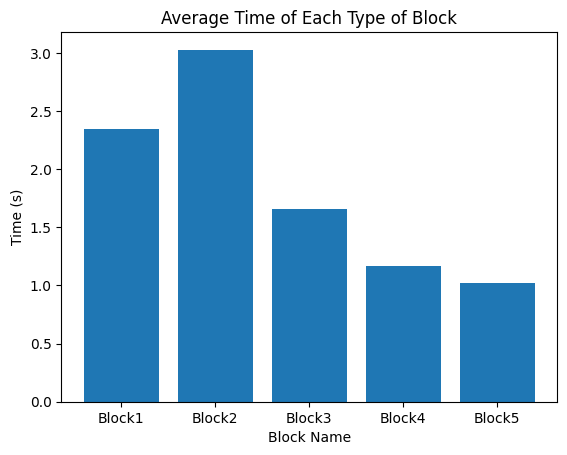

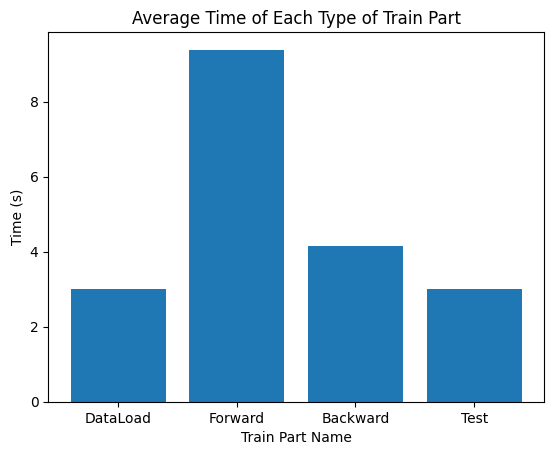

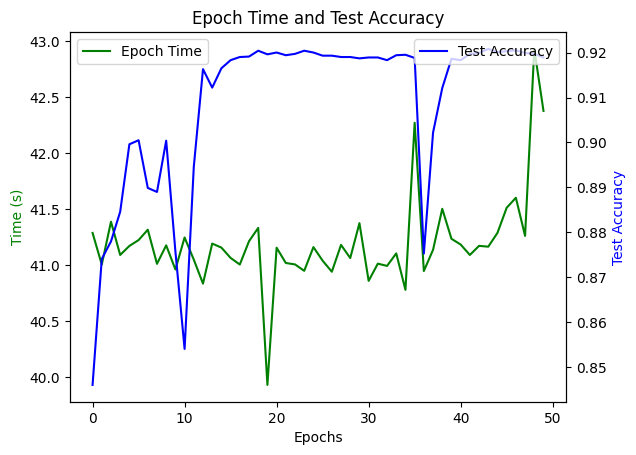

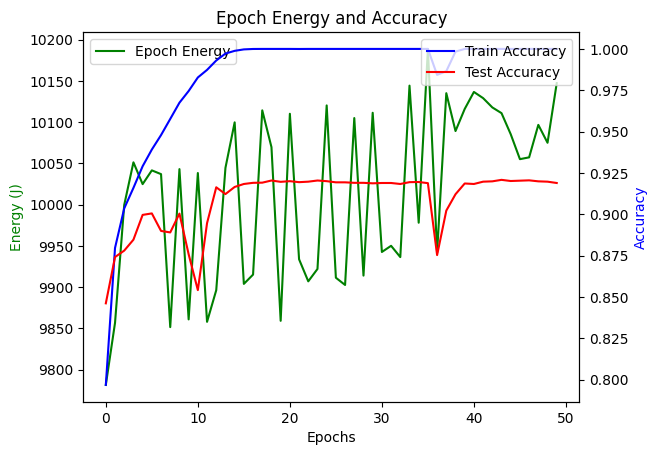

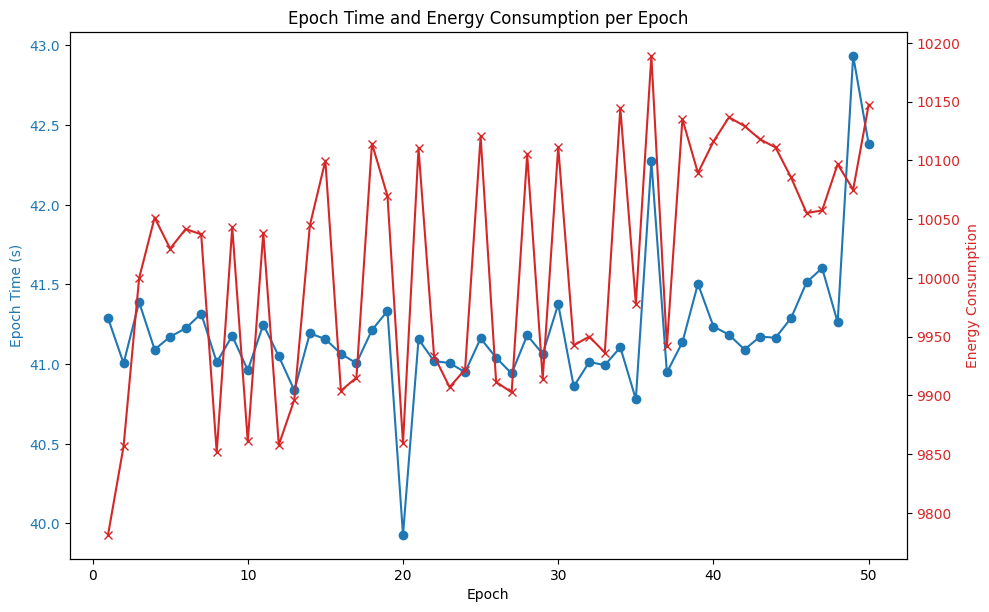

The folder path is: /root/GreenAI/Cloud/4090/Data/resnet/fashion_mnist/E50_B256_R0
The files are: ['Layers_time.npy', 'Train_part_time.npy', 'Train_time.npy', 'Train_acc.npy', 'Test_acc.npy', 'Epoch_time.npy', 'Epoch_energy.npy', 'Block_time.npy']


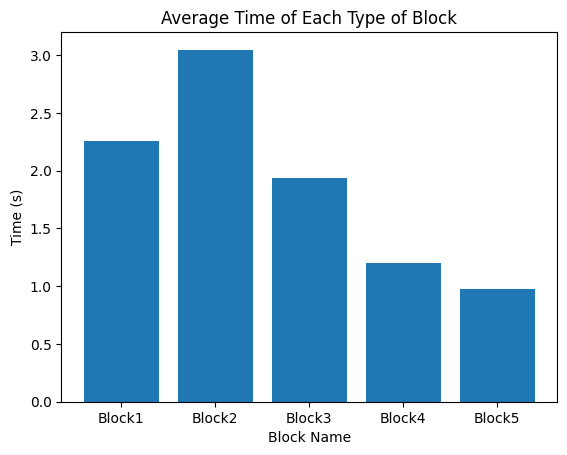

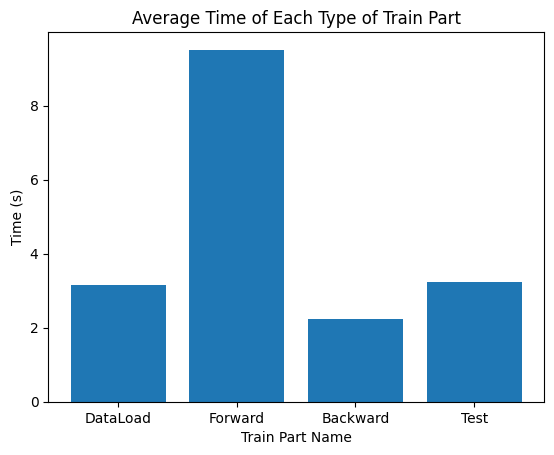

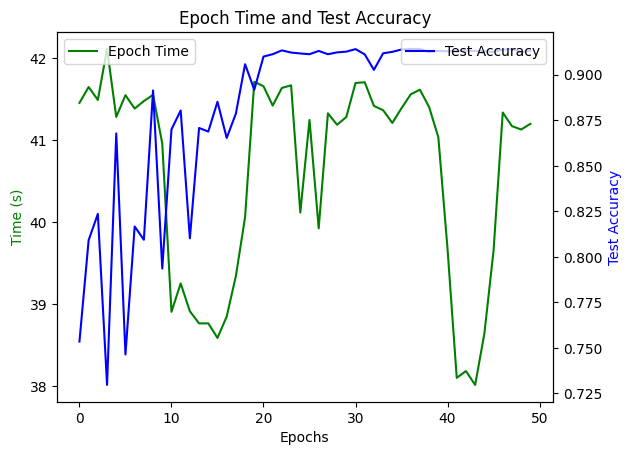

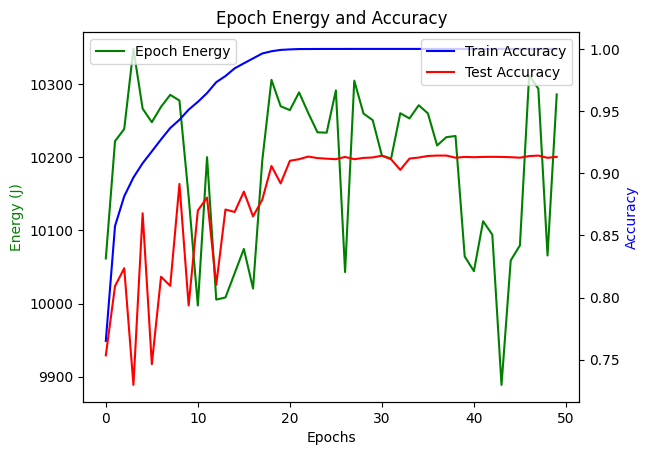

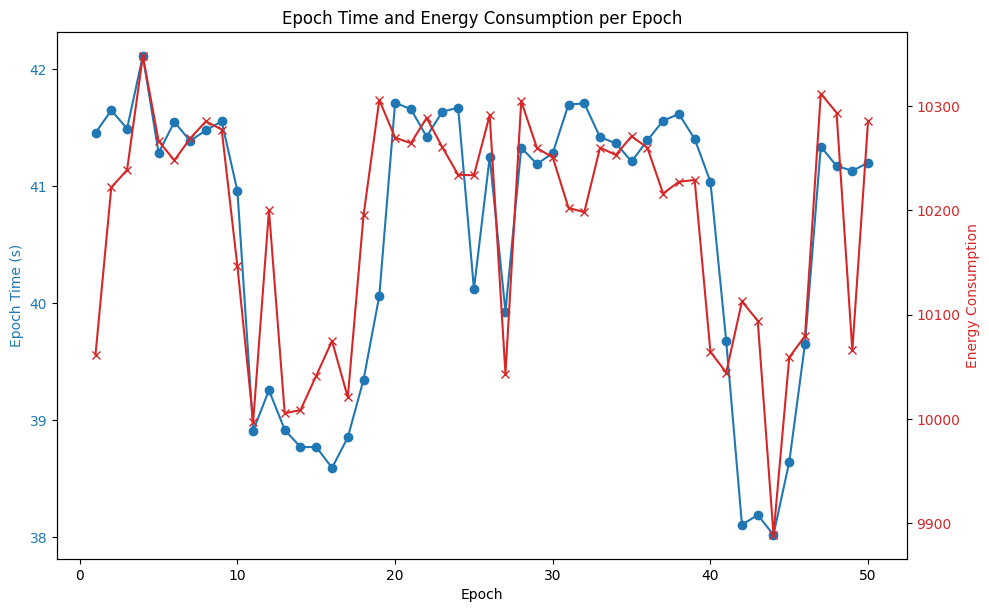

The folder path is: /root/GreenAI/Cloud/4090/Data/resnet/fashion_mnist/E50_B512_R0
The files are: ['Layers_time.npy', 'Train_part_time.npy', 'Train_time.npy', 'Train_acc.npy', 'Test_acc.npy', 'Epoch_time.npy', 'Epoch_energy.npy', 'Block_time.npy']


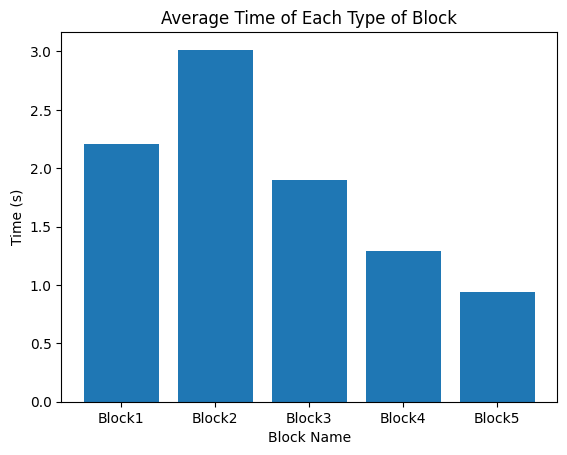

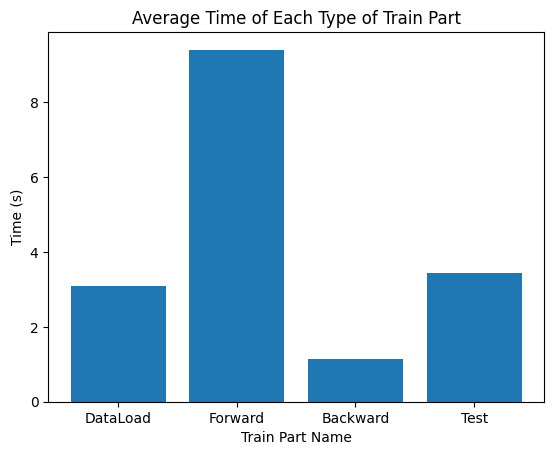

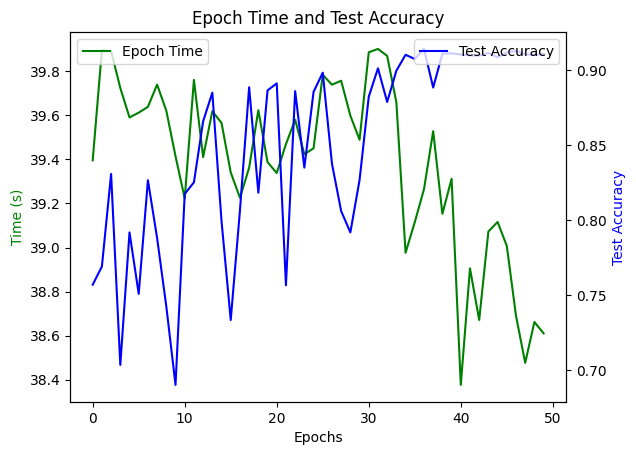

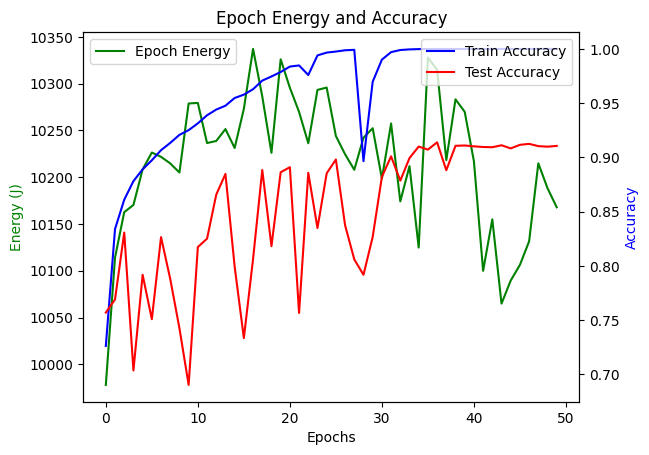

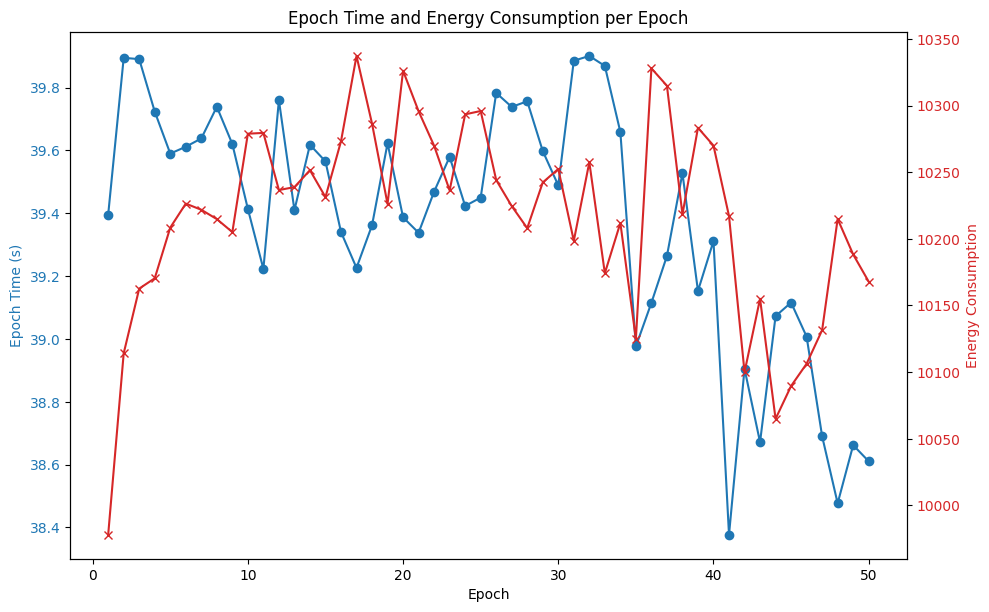

In [114]:
# read the data from the common folders
for folder in common_folders:
    folder_path = data_path / folder
    print('The folder path is:', folder_path)
    # find the files in the folder
    files = os.listdir(folder_path)
    print('The files are:', files)
    # find the csv file
    for file in files:
        # read each Layer time npy file
        Layers_time = np.load(folder_path / 'Layers_time.npy', allow_pickle=True)
        TrainPart_time = np.load(folder_path / 'Train_part_time.npy', allow_pickle=True)
        TrainTotal_time = np.load(folder_path / 'Train_time.npy', allow_pickle=True)
        TrainAcc = np.load(folder_path / 'Train_acc.npy', allow_pickle=True)
        TestAcc = np.load(folder_path / 'Test_acc.npy', allow_pickle=True)
        Epoch_time = np.load(folder_path / 'Epoch_time.npy', allow_pickle=True)
        EpochEnergy = np.load(folder_path / 'Epoch_energy.npy', allow_pickle=True)
        Block_time = np.load(folder_path / 'Block_time.npy', allow_pickle=True)
    # Layer_Time(Layers_time)
    Block_T(Block_time) 
    TrainPart_T(TrainPart_time)
    Epoch_TimeAcc(Epoch_time, TestAcc)
    Epoch_EnergyAcc(EpochEnergy, TrainAcc, TestAcc)
    Epeoch_EnergyTime(Epoch_time,EpochEnergy)
    # print(TrainPart_time)
    # print(TrainTotal_time)
    # print(TrainAcc)
    # print(TestAcc)
    # print(Epoch_time)
    # print(EpochEnergy)
    # print(Block_time)
        

#### find the data in same epoch and batch size

In [ ]:
name_dic = {
    'EpochEnergy': 'Epoch_energy',
    'EpochTime': 'Epoch_time',
    'TestAcc': 'Test_acc',
    'TrainAcc': 'Train_acc',
    'LayerTime': 'Layer_time',
    'TrainTime': 'Train_time',
    'TrainPartTime': 'Train_part_time',
    'BlockTime':'Block_time'
}

In [ ]:
# find the folders that have same epoch and batch size in common_folders
same_epoch_batch = []
for folder in common_folders:
    epoch = int(folder.split('_')[0][1:])
    batch = int(folder.split('_')[1][1:])
    same_epoch_batch.append((epoch, batch))
print('The same epoch and batch size are:', same_epoch_batch)

# find in each combination of epoch and batch size, find out the folder names
epoch_batch_folders = {}
for epoch, batch in same_epoch_batch:
    epoch_batch_folders[(epoch, batch)] = []
    for folder in common_folders:
        if int(folder.split('_')[0][1:]) == epoch and int(folder.split('_')[1][1:]) == batch:
            epoch_batch_folders[(epoch, batch)].append(folder)
print('The epoch and batch size folders are:', epoch_batch_folders)
# for each combination of epoch and batch size, find the average test accuracy, and the average energy consumption
avgenergy_acc = {}
energy_acc = {}
avgenergy_power = {}
avgpower_std = {}
Power_perepoch = {}

for eb_comb in epoch_batch_folders:
    print('The epoch and batch size combination is:', eb_comb)
    # show the lenth of the values in the dictionary
    num_values = len(epoch_batch_folders[eb_comb])
    print('The number of values in the dictionary is:', num_values)
    round_acc = np.zeros((num_values, 1))
    round_energy = np.zeros((num_values, 1))
    round_avgenergy = np.zeros((num_values, 1))
    powersec_round = np.zeros((num_values, 1))
    powerstd_epoch = np.zeros((num_values, 1))
    Power_epoch = np.zeros((num_values, 1), dtype='object')  # save each epoch avg power of each round to save a list 
    for folder in epoch_batch_folders[eb_comb]:
        files_path = data_path / folder
        files = os.listdir(files_path)
        # print('The files in the folder are:', files_path, files)
        test_acc = []
        epoch_energy = []
        powersec_epoch = []
        powerstd_epoch = []
        for f in files:
            name = f.split('.')[0]
            file_path = files_path / f
            if name in name_dic['TestAcc']:
                TestAcc = np.load(file_path, allow_pickle=True)
                test_acc.append(TestAcc[-1]) # get the last test accuracy
            elif name in name_dic['EpochEnergy']:
                EpochEnergy = np.load(file_path, allow_pickle=True)
                for energyrow in EpochEnergy:
                    # get the power consumption of each second in the epoch as well as the std of the power consumption
                    power_persec = np.mean(energyrow[0]) # get the avg power consumpt¡ion of each second in the epoch
                    power_std = np.std(energyrow[0]) # get the std of the power consumption of each second in the epoch
                    powersec_epoch.append(power_persec)
                    # print('the lenth of the power_persec is:', len(powersec_epoch))
                    powerstd_epoch.append(power_std)
                    sum_row = np.sum(energyrow[0]) # sum the energy consumption of each epoch
                    epoch_energy.append(sum_row)
        # add to the round_acc and round_energy
        indexfolder = folder.split('_')[-1][1:]
        print('The indexfolder is:', indexfolder)
        round_acc[int(indexfolder)] = np.mean(test_acc)
        powersec_round[int(indexfolder)] = np.mean(powersec_epoch)
        powerstd_epoch[int(indexfolder)] = np.mean(powerstd_epoch)
        round_avgenergy[int(indexfolder)] = np.mean(epoch_energy)  
        round_energy[int(indexfolder)] = np.sum(epoch_energy)
        Power_epoch[int(indexfolder),0] = powersec_epoch
    # calculate the average test accuracy and energy consumption
    avg_acc = np.mean(round_acc)
    powersec = np.mean(powersec_round)
    powerstd = np.mean(powerstd_epoch)
    avg_avgenergy = np.mean(round_avgenergy)
    avg_energy = np.mean(round_energy)
    avg_acc = '{:.3f}'.format(avg_acc)
    powerstd = '{:.3f}'.format(powerstd)
    powersec = '{:.3f}'.format(powersec)
    avg_avgenergy = '{:.3f}'.format(avg_avgenergy)
    avg_energy = '{:.3f}'.format(avg_energy)
    # print(f'The average test accuracy is: {avg_acc}')
    # print(f'The average of average power consumption per second is: {powersec}')
    # print(f'The average of average epoch energy consumption is: {avg_avgenergy}')
    # print(f'The average of total energy consumption is: {avg_energy}')
    # print(f'The average of power consumption std is: {powerstd}')
    # save the average test accuracy and energy consumption to the dictionary,
    # the key is the eb_comb, and the value is the average test accuracy and energy consumption\
    avgenergy_acc[eb_comb] = (avg_acc, avg_avgenergy)
    energy_acc[eb_comb] = (avg_acc, avg_energy)
    avgenergy_power[eb_comb] = (powersec, avg_avgenergy)
    avgpower_std[eb_comb] = (powersec, powerstd)
    Power_perepoch[eb_comb] = Power_epoch

# print('The energy consumption and accuracy are:', energy_acc)
# print('The average energy consumption and accuracy are:', avgenergy_acc)
# print('The power consumption per second is:', avgenergy_power)
# print('The power consumption and std are:', avgpower_std)
print('The power consumption of each epoch is:', Power_perepoch)

The same epoch and batch size are: [(10, 128), (10, 256), (10, 512), (20, 128), (20, 256), (20, 512), (30, 128), (30, 256), (30, 512), (40, 128), (40, 256), (40, 512), (50, 128), (50, 256), (50, 512)]
The epoch and batch size folders are: {(10, 128): ['E10_B128_R0'], (10, 256): ['E10_B256_R0'], (10, 512): ['E10_B512_R0'], (20, 128): ['E20_B128_R0'], (20, 256): ['E20_B256_R0'], (20, 512): ['E20_B512_R0'], (30, 128): ['E30_B128_R0'], (30, 256): ['E30_B256_R0'], (30, 512): ['E30_B512_R0'], (40, 128): ['E40_B128_R0'], (40, 256): ['E40_B256_R0'], (40, 512): ['E40_B512_R0'], (50, 128): ['E50_B128_R0'], (50, 256): ['E50_B256_R0'], (50, 512): ['E50_B512_R0']}
The epoch and batch size combination is: (10, 128)
The number of values in the dictionary is: 1
The indexfolder is: 0
The epoch and batch size combination is: (10, 256)
The number of values in the dictionary is: 1
The indexfolder is: 0
The epoch and batch size combination is: (10, 512)
The number of values in the dictionary is: 1
The inde

### plot results

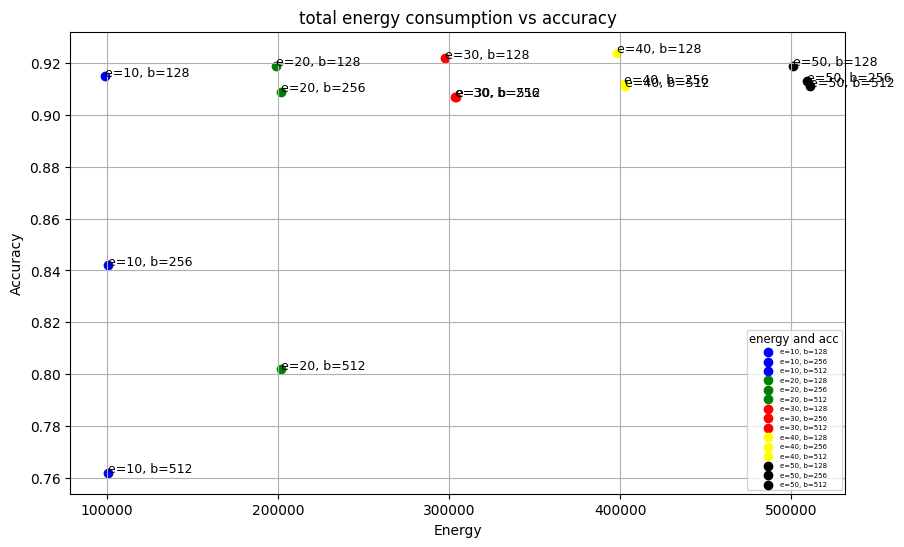

In [ ]:
'''
The accuracy is the average of 5 rounds final test accuracy
The energy consumption is the average of 5 rounds total energy consumption
'''
# Prepare lists for plotting
energies = [float(values[1]) for values in energy_acc.values()]
accuracies = [float(values[0]) for values in energy_acc.values()]
labels = [f"e={key[0]}, b={key[1]}" for key in energy_acc.keys()]

# Extracting unique Param1 values and assigning colors
unique_param1 = np.unique([key[0] for key in energy_acc.keys()])
colors = ['blue', 'green', 'red', 'yellow', 'black']
color_map = dict(zip(unique_param1, colors))

# Prepare lists for plotting with colors
colors_for_plot = [color_map[key[0]] for key in energy_acc.keys()]

# Create scatter plot with colors
plt.figure(figsize=(10, 6))
for (energy, accuracy, label, color) in zip(energies, accuracies, labels, colors_for_plot):
    plt.scatter(energy, accuracy, color=color, label=label if label.split(',')[0] not in plt.gca().get_legend_handles_labels()[1] else "")
    plt.text(energy, accuracy, label, fontsize=9)

# Adding titles and labels
plt.title('total energy consumption vs accuracy')
plt.xlabel('Energy')
plt.ylabel('Accuracy')
plt.grid(True)
plt.legend(title="energy and acc", loc='lower right', fontsize=5, title_fontsize='small')

# Show plot
plt.show()


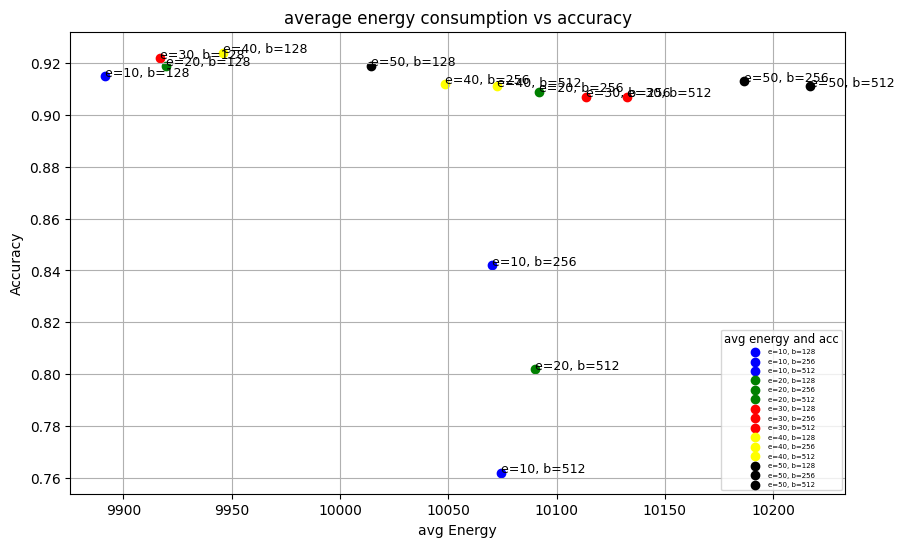

In [ ]:
'''
The accuracy is the average of 5 rounds final test accuracy
The energy consumption is the average of 5 rounds total energy consumption
'''
# Prepare lists for plotting
energies = [float(values[1]) for values in avgenergy_acc.values()]
accuracies = [float(values[0]) for values in avgenergy_acc.values()]
labels = [f"e={key[0]}, b={key[1]}" for key in avgenergy_acc.keys()]

# Extracting unique Param1 values and assigning colors
unique_param1 = np.unique([key[0] for key in avgenergy_acc.keys()])
colors = ['blue', 'green', 'red', 'yellow', 'black']
color_map = dict(zip(unique_param1, colors))

# Prepare lists for plotting with colors
colors_for_plot = [color_map[key[0]] for key in avgenergy_acc.keys()]

# Create scatter plot with colors
plt.figure(figsize=(10, 6))
for (energy, accuracy, label, color) in zip(energies, accuracies, labels, colors_for_plot):
    plt.scatter(energy, accuracy, color=color, label=label if label.split(',')[0] not in plt.gca().get_legend_handles_labels()[1] else "")
    plt.text(energy, accuracy, label, fontsize=9)

# Adding titles and labels
plt.title('average energy consumption vs accuracy')
plt.xlabel('avg Energy')
plt.ylabel('Accuracy')
plt.grid(True)
# set the legend size
plt.legend(title="avg energy and acc", loc='lower right', fontsize=5, title_fontsize='small')

# Show plot
plt.show()


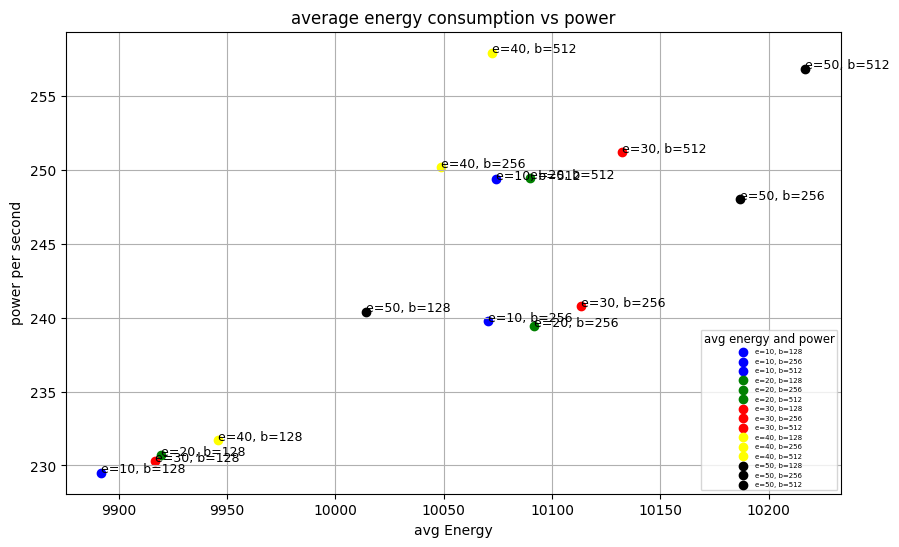

In [ ]:
'''
The accuracy is the average of 5 rounds power consumption per second
The energy consumption is the average of 5 rounds total energy consumption
'''
# Prepare lists for plotting
energies = [float(values[1]) for values in avgenergy_power.values()]
accuracies = [float(values[0]) for values in avgenergy_power.values()]
labels = [f"e={key[0]}, b={key[1]}" for key in avgenergy_power.keys()]

# Extracting unique Param1 values and assigning colors
unique_param1 = np.unique([key[0] for key in avgenergy_power.keys()])
colors = ['blue', 'green', 'red', 'yellow', 'black']
color_map = dict(zip(unique_param1, colors))

# Prepare lists for plotting with colors
colors_for_plot = [color_map[key[0]] for key in avgenergy_power.keys()]

# Create scatter plot with colors
plt.figure(figsize=(10, 6))
for (energy, accuracy, label, color) in zip(energies, accuracies, labels, colors_for_plot):
    plt.scatter(energy, accuracy, color=color, label=label if label.split(',')[0] not in plt.gca().get_legend_handles_labels()[1] else "")
    plt.text(energy, accuracy, label, fontsize=9)

# Adding titles and labels
plt.title('average energy consumption vs power')
plt.xlabel('avg Energy')
plt.ylabel('power per second')
plt.grid(True)
plt.legend(title="avg energy and power", loc='lower right', fontsize=5, title_fontsize='small')

# Show plot
plt.show()


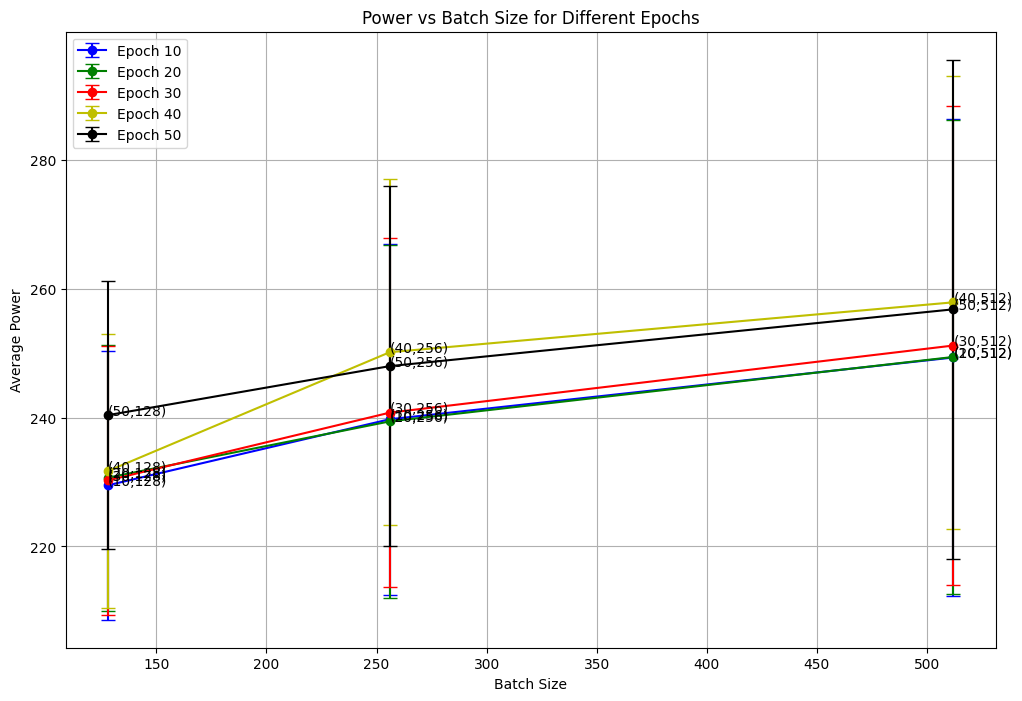

In [ ]:
# Data dictionary
data = avgpower_std
# Extract unique epochs and batch sizes
epochs = sorted(set(e for e, _ in data.keys()))
batch_sizes = sorted(set(b for _, b in data.keys()))

# Colors and labels for different epochs
colors = ['b', 'g', 'r', 'y', 'black']  # Blue, Green, Red, Yellow, Purple for epochs 10, 20, 30
labels = ['Epoch 10', 'Epoch 20', 'Epoch 30', 'Epoch 40', 'Epoch 50']

# Create a figure
plt.figure(figsize=(12, 8))

# Plot data with annotations
for i, epoch in enumerate(epochs):
    x = []
    y = []
    yerr = []
    for batch_size in batch_sizes:
        # check if the epoch and batch size is in the data
        if (epoch, batch_size) not in data:
            pass
        else:
            avg_power, std_dev = data[(epoch, batch_size)]
            x.append(batch_size)
            y.append(float(avg_power))
            yerr.append(float(std_dev))
        
        # Annotate each data point
        plt.text(batch_size, float(avg_power), f'({epoch},{batch_size})')

    # Plot error bars and points
    plt.errorbar(x, y, yerr=yerr, fmt='o-', color=colors[i], capsize=5, label=labels[i])

# Set labels and title
plt.xlabel('Batch Size')
plt.ylabel('Average Power')
plt.title('Power vs Batch Size for Different Epochs')
plt.grid(True)
plt.legend()

# Display the plot
plt.show()

In [ ]:
# for data in Power_perepoch, find the key value start with 10
power_epoch_10 = {}
power_epoch_20 = {}
power_epoch_30 = {}
power_epoch_40 = {}
power_epoch_50 = {}
for key, value in Power_perepoch.items():
    if key[0] == 10:
        power_epoch_10[key] = value[0][0]
    elif key[0] == 20:
        power_epoch_20[key] = value[0][0]
    elif key[0] == 30:
        power_epoch_30[key] = value[0][0]
    elif key[0] == 40:
        power_epoch_40[key] = value[0][0]
    elif key[0] == 50:
        power_epoch_50[key] = value[0][0]
print('The power consumption of each epoch of the 10 epochs is:', power_epoch_10)
print('The power consumption of each epoch of the 20 epochs is:', power_epoch_20)
print('The power consumption of each epoch of the 30 epochs is:', power_epoch_30)
print('The power consumption of each epoch of the 40 epochs is:', power_epoch_40)
print('The power consumption of each epoch of the 50 epochs is:', power_epoch_50)


The power consumption of each epoch of the 10 epochs is: {(10, 128): [223.08418604651163, 228.55000000000004, 229.28255813953487, 230.73302325581398, 230.99418604651163, 231.4744186046511, 228.4775, 230.3558139534884, 231.10906976744187, 231.02348837209303], (10, 256): [236.132619047619, 239.0040476190476, 240.9690476190476, 240.53523809523807, 240.41119047619048, 240.88785714285717, 239.04285714285717, 240.13261904761904, 239.925, 240.6552380952381], (10, 512): [248.89000000000001, 247.7878048780488, 249.56925, 248.0609756097561, 248.19560975609758, 251.32375000000002, 249.21902439024393, 249.57536585365855, 250.06949999999998, 250.98725]}
The power consumption of each epoch of the 20 epochs is: {(20, 128): [226.7281395348837, 230.66813953488372, 231.32023255813954, 231.0639534883721, 230.44581395348834, 230.40116279069767, 229.65325581395348, 230.59511627906977, 230.35139534883723, 230.9772093023256, 230.6797674418605, 231.32651162790697, 231.28093023255818, 231.55488372093023, 231.1

##### epoch is 10

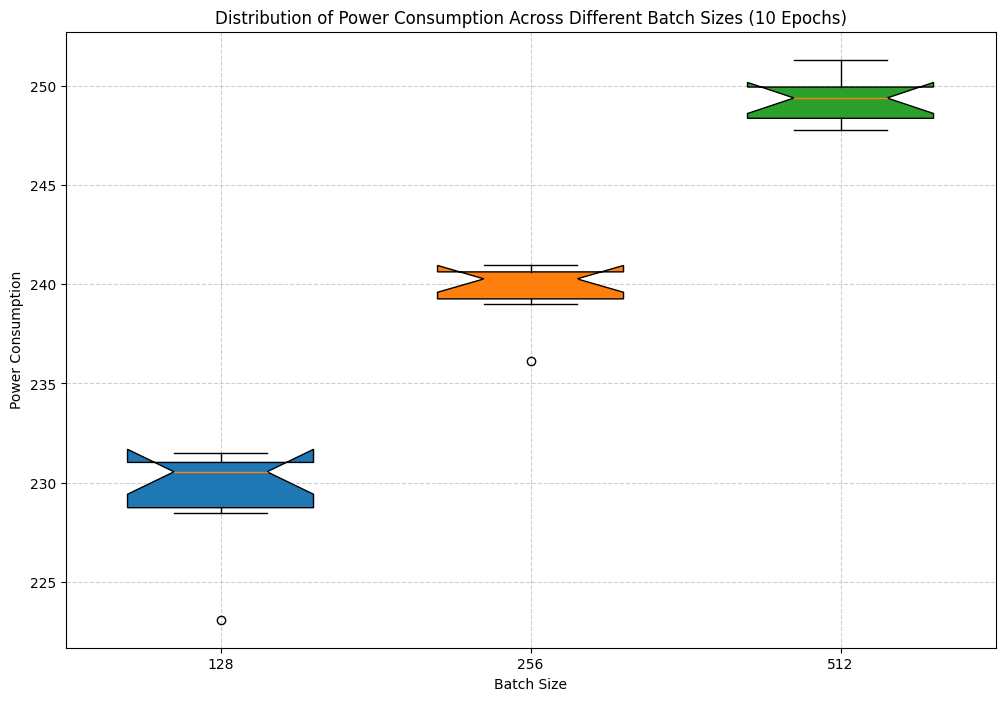

In [ ]:
fig, ax = plt.subplots(figsize=(12, 8))
positions = [1, 2, 3]
labels = ['128', '256', '512']
epoch = 10

# Collecting all data for boxplot grouped by batch size (all epochs combined for simplicity here)
boxplot_data = [power_epoch_10[(epoch, bs)] for bs in [128, 256, 512]]
bp = ax.boxplot(boxplot_data, patch_artist=True, positions=positions, notch=True, widths=0.6)

# Coloring and styling
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd']
for patch, color in zip(bp['boxes'], colors):
    patch.set_facecolor(color)

ax.set_title('Distribution of Power Consumption Across Different Batch Sizes (10 Epochs)')
ax.set_xlabel('Batch Size')
ax.set_ylabel('Power Consumption')
ax.set_xticks(positions)
ax.set_xticklabels(labels)
ax.grid(True, linestyle='--', alpha=0.6)

plt.show()



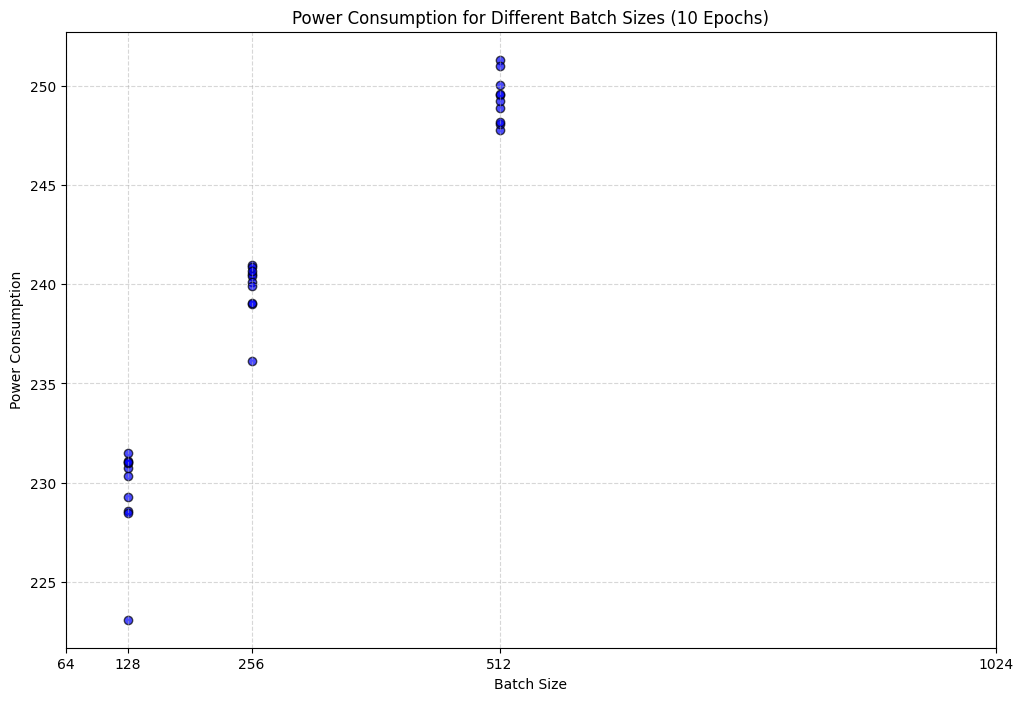

In [ ]:
# Data preparation for scatter plot
batch_sizes_expanded = []
power_consumption_values = []

# Iterate over each batch size and corresponding power values
for (epochs, batch_size), values in power_epoch_10.items():
    batch_sizes_expanded.extend([batch_size] * len(values))
    power_consumption_values.extend(values)

# Creating the scatter plot
plt.figure(figsize=(12, 8))
plt.scatter(batch_sizes_expanded, power_consumption_values, color='blue', alpha=0.7, edgecolors='black')

# Plot formatting
plt.title('Power Consumption for Different Batch Sizes (10 Epochs)')
plt.xlabel('Batch Size')
plt.ylabel('Power Consumption')
plt.xticks([64, 128, 256, 512, 1024])  # Only show relevant batch sizes
plt.grid(True, linestyle='--', alpha=0.5)

plt.show()


##### epoch is 20

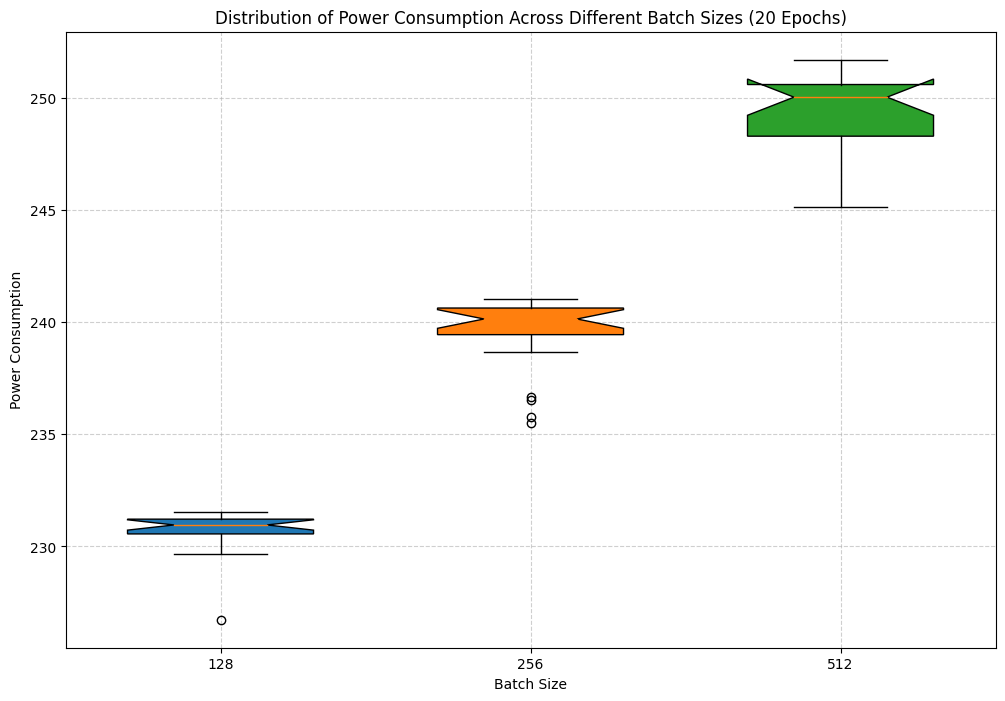

In [ ]:
fig, ax = plt.subplots(figsize=(12, 8))
positions = [1, 2, 3]
labels = ['128', '256', '512']
epoch = 20

# Collecting all data for boxplot grouped by batch size (all epochs combined for simplicity here)
boxplot_data = [power_epoch_20[(epoch, bs)] for bs in [128, 256, 512]]
bp = ax.boxplot(boxplot_data, patch_artist=True, positions=positions, notch=True, widths=0.6)

# Coloring and styling
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd']
for patch, color in zip(bp['boxes'], colors):
    patch.set_facecolor(color)

ax.set_title(f'Distribution of Power Consumption Across Different Batch Sizes ({epoch} Epochs)')
ax.set_xlabel('Batch Size')
ax.set_ylabel('Power Consumption')
ax.set_xticks(positions)
ax.set_xticklabels(labels)
ax.grid(True, linestyle='--', alpha=0.6)

plt.show()



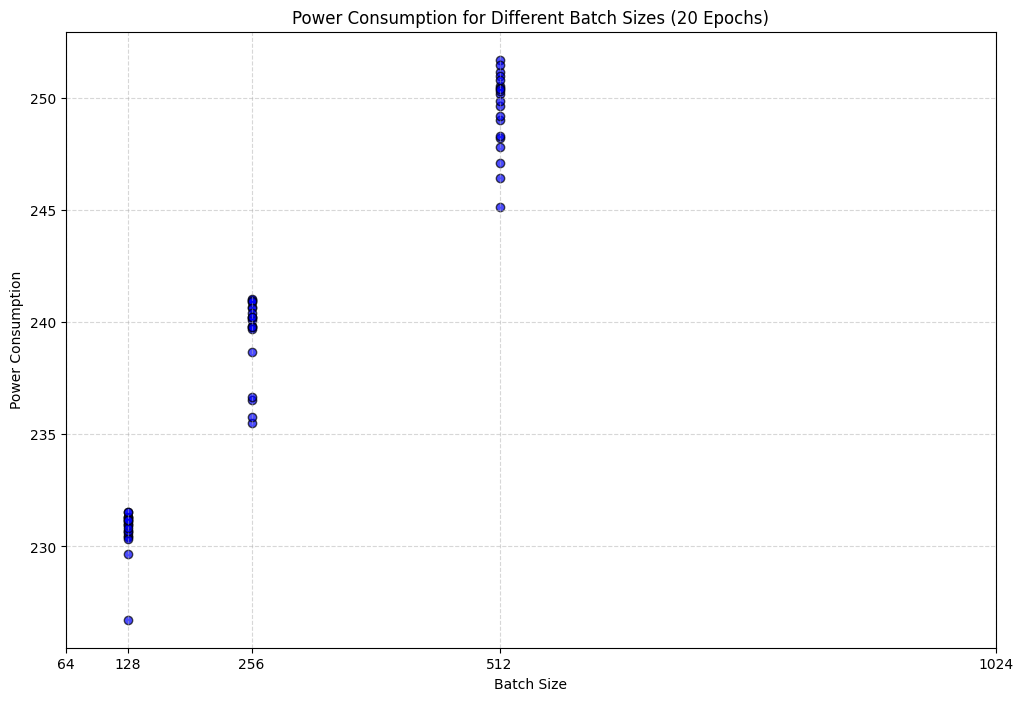

In [ ]:
# Data preparation for scatter plot
batch_sizes_expanded = []
power_consumption_values = []

# Iterate over each batch size and corresponding power values
for (epochs, batch_size), values in power_epoch_20.items():
    batch_sizes_expanded.extend([batch_size] * len(values))
    power_consumption_values.extend(values)

# Creating the scatter plot
plt.figure(figsize=(12, 8))
plt.scatter(batch_sizes_expanded, power_consumption_values, color='blue', alpha=0.7, edgecolors='black')

# Plot formatting
plt.title(f'Power Consumption for Different Batch Sizes ({epoch} Epochs)')
plt.xlabel('Batch Size')
plt.ylabel('Power Consumption')
plt.xticks([64, 128, 256, 512, 1024])  # Only show relevant batch sizes
plt.grid(True, linestyle='--', alpha=0.5)

plt.show()

##### epoch is 30

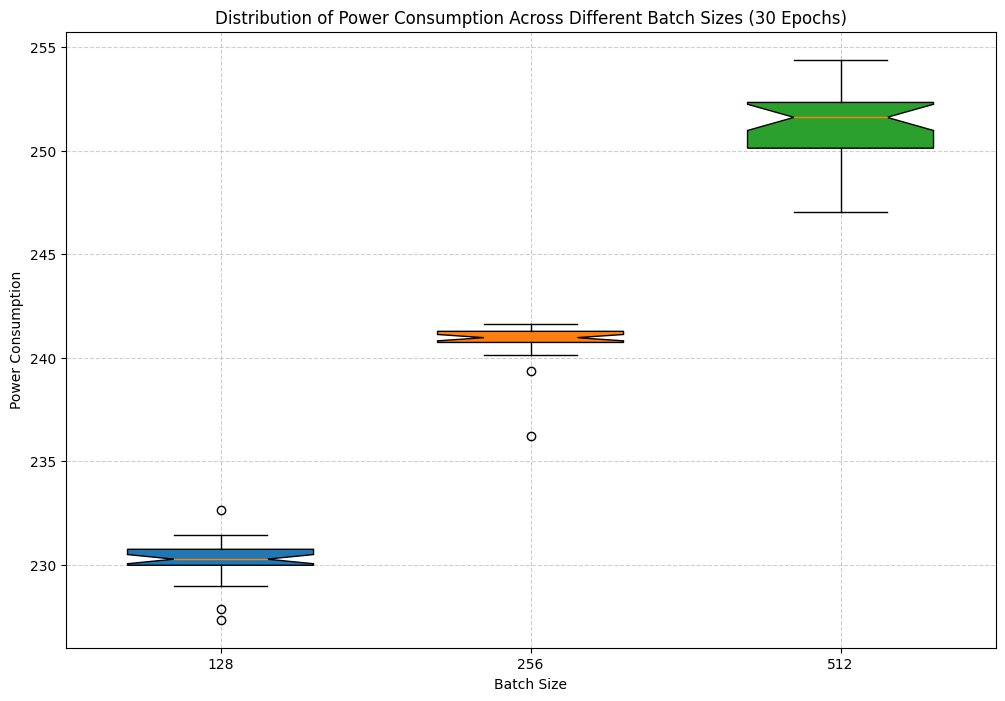

In [ ]:
fig, ax = plt.subplots(figsize=(12, 8))
positions = [1, 2, 3]
labels = ['128', '256', '512']
epoch = 30
# Collecting all data for boxplot grouped by batch size (all epochs combined for simplicity here)
boxplot_data = [power_epoch_30[(epoch, bs)] for bs in [128, 256, 512]]
bp = ax.boxplot(boxplot_data, patch_artist=True, positions=positions, notch=True, widths=0.6)

# Coloring and styling
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd']
for patch, color in zip(bp['boxes'], colors):
    patch.set_facecolor(color)

ax.set_title(f'Distribution of Power Consumption Across Different Batch Sizes ({epoch} Epochs)')
ax.set_xlabel('Batch Size')
ax.set_ylabel('Power Consumption')
ax.set_xticks(positions)
ax.set_xticklabels(labels)
ax.grid(True, linestyle='--', alpha=0.6)

plt.show()



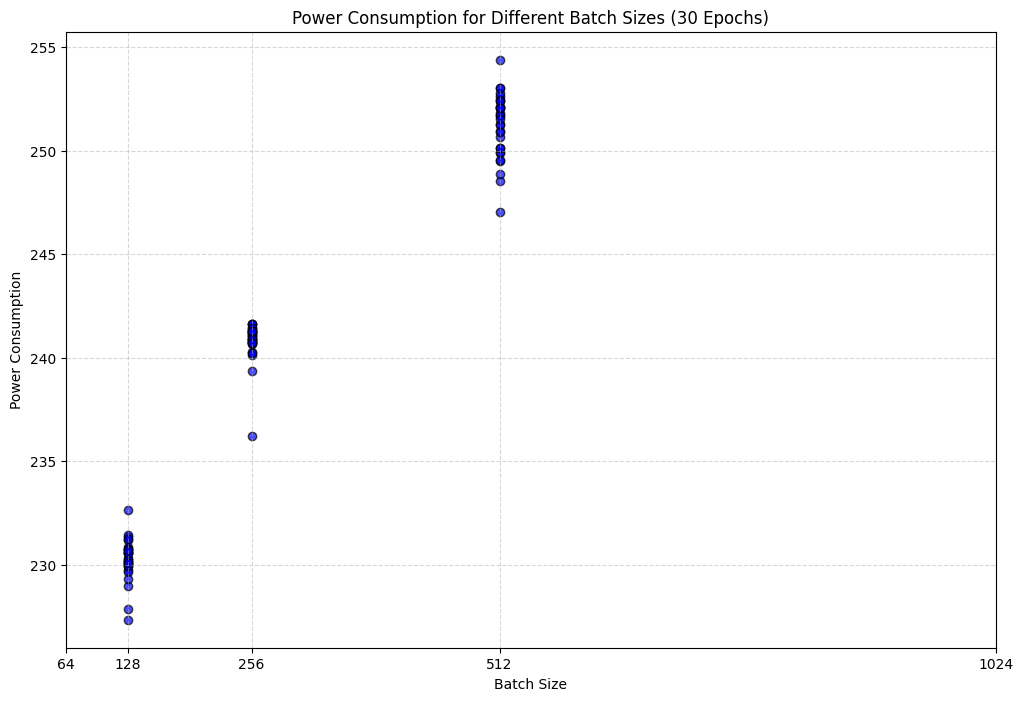

In [ ]:
# Data preparation for scatter plot
batch_sizes_expanded = []
power_consumption_values = []

# Iterate over each batch size and corresponding power values
for (epochs, batch_size), values in power_epoch_30.items():
    batch_sizes_expanded.extend([batch_size] * len(values))
    power_consumption_values.extend(values)

# Creating the scatter plot
plt.figure(figsize=(12, 8))
plt.scatter(batch_sizes_expanded, power_consumption_values, color='blue', alpha=0.7, edgecolors='black')

# Plot formatting
plt.title(f'Power Consumption for Different Batch Sizes ({epoch} Epochs)')
plt.xlabel('Batch Size')
plt.ylabel('Power Consumption')
plt.xticks([64, 128, 256, 512, 1024])  # Only show relevant batch sizes
plt.grid(True, linestyle='--', alpha=0.5)

plt.show()

##### epoch is 40

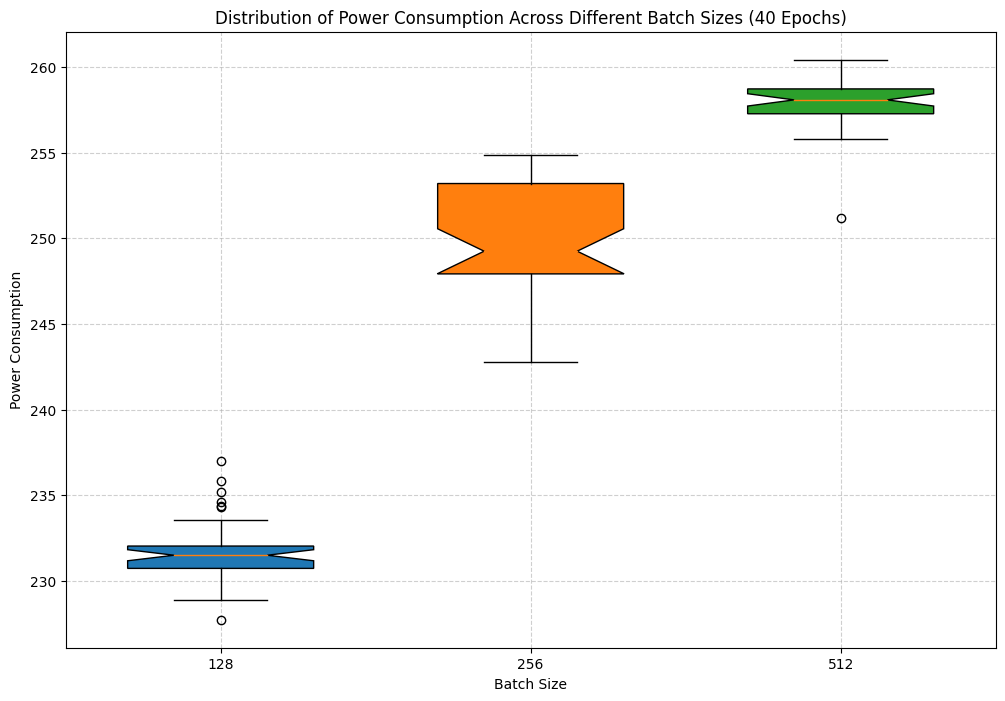

In [ ]:
fig, ax = plt.subplots(figsize=(12, 8))
positions = [1, 2, 3]
labels = ['128', '256', '512']
epoch = 40
# Collecting all data for boxplot grouped by batch size (all epochs combined for simplicity here)
boxplot_data = [power_epoch_40[(epoch, bs)] for bs in [128, 256, 512]]
bp = ax.boxplot(boxplot_data, patch_artist=True, positions=positions, notch=True, widths=0.6)

# Coloring and styling
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd']
for patch, color in zip(bp['boxes'], colors):
    patch.set_facecolor(color)

ax.set_title(f'Distribution of Power Consumption Across Different Batch Sizes ({epoch} Epochs)')
ax.set_xlabel('Batch Size')
ax.set_ylabel('Power Consumption')
ax.set_xticks(positions)
ax.set_xticklabels(labels)
ax.grid(True, linestyle='--', alpha=0.6)

plt.show()



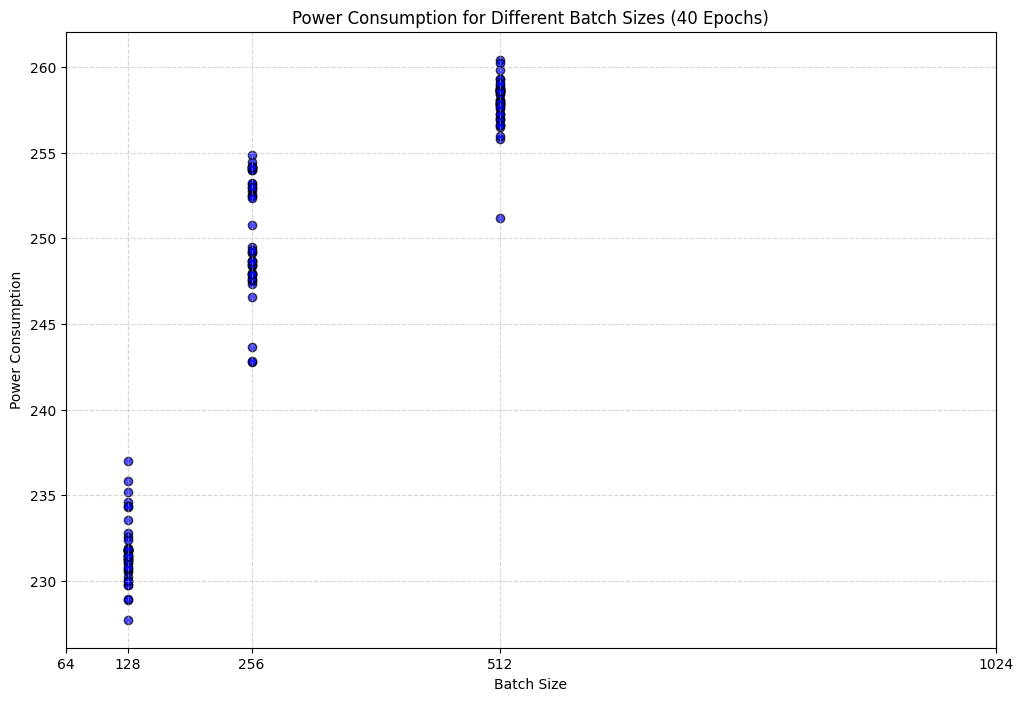

In [ ]:
# Data preparation for scatter plot
batch_sizes_expanded = []
power_consumption_values = []

# Iterate over each batch size and corresponding power values
for (epochs, batch_size), values in power_epoch_40.items():
    batch_sizes_expanded.extend([batch_size] * len(values))
    power_consumption_values.extend(values)

# Creating the scatter plot
plt.figure(figsize=(12, 8))
plt.scatter(batch_sizes_expanded, power_consumption_values, color='blue', alpha=0.7, edgecolors='black')

# Plot formatting
plt.title(f'Power Consumption for Different Batch Sizes ({epoch} Epochs)')
plt.xlabel('Batch Size')
plt.ylabel('Power Consumption')
plt.xticks([64, 128, 256, 512, 1024])  # Only show relevant batch sizes
plt.grid(True, linestyle='--', alpha=0.5)

plt.show()

##### epoch is 50

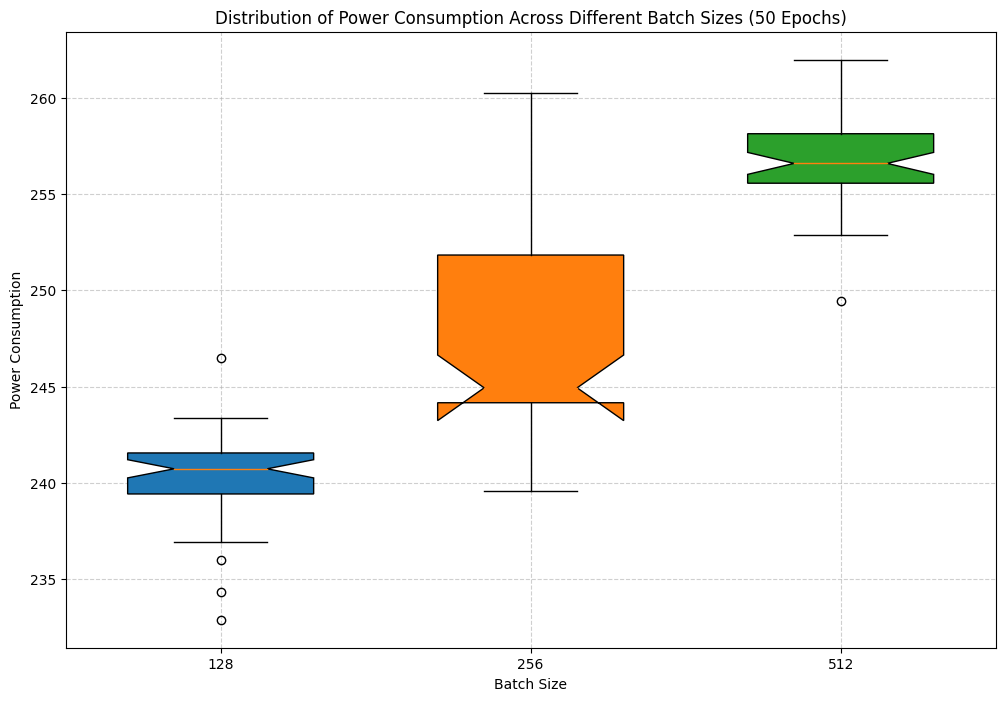

In [ ]:
fig, ax = plt.subplots(figsize=(12, 8))
positions = [1, 2, 3]
labels = ['128', '256', '512']
epoch = 50
# Collecting all data for boxplot grouped by batch size (all epochs combined for simplicity here)
# for key, value in power_epoch_50.items():
#     print('The key and value is:', key, value)
    
boxplot_data = [power_epoch_50[(epoch, bs)] for bs in [128, 256, 512]]
bp = ax.boxplot(boxplot_data, patch_artist=True, positions=positions, notch=True, widths=0.6)

# Coloring and styling
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728']
for patch, color in zip(bp['boxes'], colors):
    patch.set_facecolor(color)

ax.set_title(f'Distribution of Power Consumption Across Different Batch Sizes ({epoch} Epochs)')
ax.set_xlabel('Batch Size')
ax.set_ylabel('Power Consumption')
ax.set_xticks(positions)
ax.set_xticklabels(labels)
ax.grid(True, linestyle='--', alpha=0.6)

plt.show()



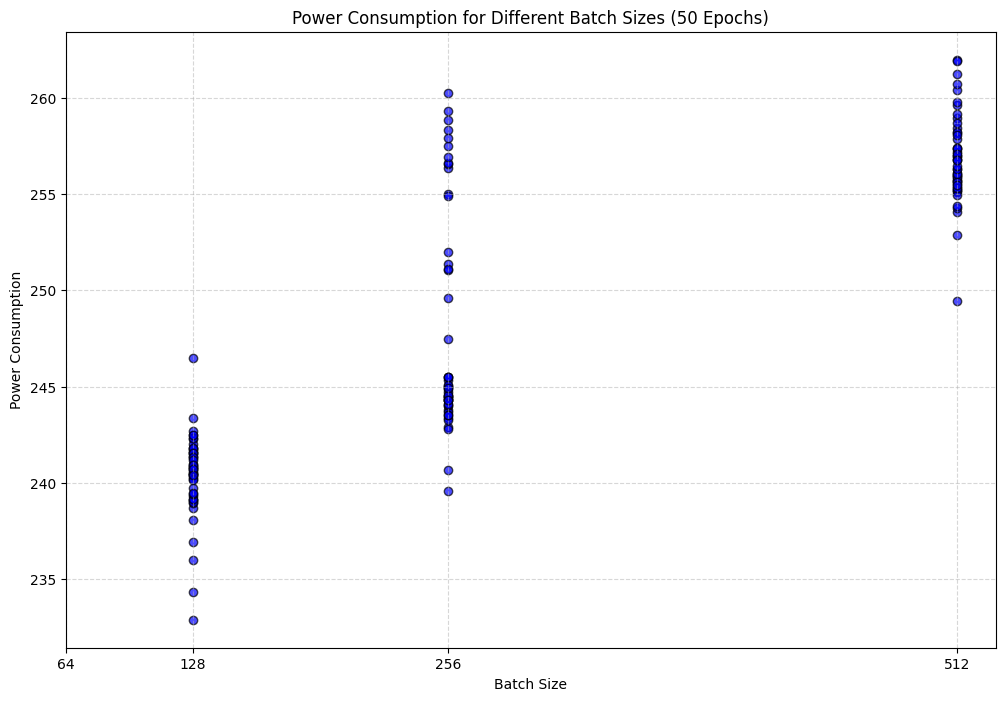

In [ ]:
# Data preparation for scatter plot
batch_sizes_expanded = []
power_consumption_values = []

# Iterate over each batch size and corresponding power values
for (epochs, batch_size), values in power_epoch_50.items():
    batch_sizes_expanded.extend([batch_size] * len(values))
    power_consumption_values.extend(values)

# Creating the scatter plot
plt.figure(figsize=(12, 8))
plt.scatter(batch_sizes_expanded, power_consumption_values, color='blue', alpha=0.7, edgecolors='black')

# Plot formatting
plt.title(f'Power Consumption for Different Batch Sizes ({epoch} Epochs)')
plt.xlabel('Batch Size')
plt.ylabel('Power Consumption')
plt.xticks([64, 128, 256, 512])  # Only show relevant batch sizes
plt.grid(True, linestyle='--', alpha=0.5)

plt.show()